# <span style="color:blue">Lead Scoring Case study</span>

# Problem Statement

___An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.___

 

___The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.___

 

___Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:___

<img src="filter.jpg" alt="Descriptive image alt text">


___As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.___

 

___X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.___


- ___Data___

___You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).___

 

- ___Goals of the Case Study___

___There are quite a few goals for this case study:___

___Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.___


### Importing all necessary libraries:

In [147]:
# basic libraries to work on the dataframe
import pandas as pd
import numpy as np
# data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# libraries
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

#Increasing the columns views limit
pd.options.display.max_columns = None
pd.options.display.max_rows = 150
pd.options.display.float_format = '{:.2f}'.format

### Exploring the datasets:

In [2]:
# Read the data
df_lead=pd.read_csv('Leads.csv')
df_lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [3]:
df_lead.shape

(9240, 37)

In [4]:
df_lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


In [5]:
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### <span style="color:red">Conclusion:</span>
- ___There are a lot of columns with null values. These should ideally be dropped___
- ___Prospect ID and Lead Number deliver the same information and one can be dropped___

In [6]:
# Checking for duplicates in  Prospect ID and Lead Number
df_lead.duplicated(subset='Prospect ID', keep=False).sum()

0

In [7]:
df_lead.duplicated(subset='Lead Number', keep=False).sum()

0

So, there are no duplicate values in both the columns

### Cleaning the data:

In [8]:
#Dropping Lead Number and Prospect ID since they have all unique values

df_lead.drop(['Prospect ID','Lead Number'], 1, inplace = True)

- As mentioned in the problem statement, __many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value__. The reason for this is, when people do not select any option, it will reflect __"Select"__

In [9]:
# List of columns having 'Select' as value

cols_with_select_value = df_lead.columns[df_lead.isin(['Select']).nunique() > 1]
print(cols_with_select_value.tolist())

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [10]:
# replacing 'Select' with 'Nan'
df_lead.replace('Select', np.nan, inplace=True)

In [11]:
# Checking again for 'Select' values
select_counts = df_lead.isin(['Select']).sum()
remaining_select_cols = select_counts[select_counts > 0].index.tolist()

if remaining_select_cols:
    print(f"These columns still contain 'Select' values: {remaining_select_cols}")
else:
    print("All 'Select' values have been handled.")

All 'Select' values have been handled.


### Handling all missing values:

In [12]:
# Calculating the Percentage of Missing Values

100*(df_lead.isna().mean()).sort_values(ascending=False)

How did you hear about X Education              78.46
Lead Profile                                    74.19
Lead Quality                                    51.59
Asymmetrique Activity Score                     45.65
Asymmetrique Profile Score                      45.65
Asymmetrique Profile Index                      45.65
Asymmetrique Activity Index                     45.65
City                                            39.71
Specialization                                  36.58
Tags                                            36.29
What matters most to you in choosing a course   29.32
What is your current occupation                 29.11
Country                                         26.63
TotalVisits                                      1.48
Page Views Per Visit                             1.48
Last Activity                                    1.11
Lead Source                                      0.39
Get updates on DM Content                        0.00
Update me on Supply Chain Co

#### <span style="color:red">Conclusion:</span>
- ___There are few columns with more than 40% missing values___

In [13]:
# Dropping missing values more than 40% using UDF(user-defined function)
def drop_columns(data ,percentage=40):
    
    missing_percent = 100*(data.isna().mean()).sort_values(ascending=False)
    col_to_drop = missing_percent[missing_percent>=percentage].index.to_list()
    print("Total columns dropped: ",len(col_to_drop),"\n")
    print("List of columns dropped : " , col_to_drop,"\n")
    print("Shape before dropping columns: ",data.shape)
    data.drop(labels=col_to_drop,axis=1, inplace=True)
    print("Shape after dropping columns: ",data.shape)

In [14]:
# Calling UDF function
drop_columns(df_lead)

Total columns dropped:  7 

List of columns dropped :  ['How did you hear about X Education', 'Lead Profile', 'Lead Quality', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'Asymmetrique Profile Index', 'Asymmetrique Activity Index'] 

Shape before dropping columns:  (9240, 35)
Shape after dropping columns:  (9240, 28)


In [15]:
# Agan checking percentage of null values
100*(df_lead.isna().mean()).sort_values(ascending=False)

City                                            39.71
Specialization                                  36.58
Tags                                            36.29
What matters most to you in choosing a course   29.32
What is your current occupation                 29.11
Country                                         26.63
TotalVisits                                      1.48
Page Views Per Visit                             1.48
Last Activity                                    1.11
Lead Source                                      0.39
Receive More Updates About Our Courses           0.00
Update me on Supply Chain Content                0.00
Lead Origin                                      0.00
Digital Advertisement                            0.00
Get updates on DM Content                        0.00
I agree to pay the amount through cheque         0.00
A free copy of Mastering The Interview           0.00
Through Recommendations                          0.00
Magazine                    

Handling null values less than 40% one by one

### <span style="color:brown">1) City:</span>

In [16]:
# Calculate city distribution, including non-Mumbai cities in Maharashtra
city_counts = df_lead['City'].value_counts(normalize=True, dropna=False) * 100

# Categorize non-Mumbai cities within Maharashtra
df_lead.loc[(df_lead['City'] == 'Thane & Outskirts') | (df_lead['City'] == 'Other Cities of Maharashtra'), 'City'] = 'Non-Mumbai Maharashtra Cities'

# Categorize other cities
df_lead.loc[(df_lead['City'] == 'Other Cities') | (df_lead['City'] == 'Other Metro Cities') | (df_lead['City'] == 'Tier II Cities'), 'City'] = 'Non-Maharashtra Cities'

# Display distribution after categorization
print("City distribution after categorization:")
print(df_lead['City'].value_counts(normalize=True))

# Impute missing city values proportionally based on distribution
df_lead['City'] = df_lead['City'].fillna(pd.Series(np.random.choice(['Mumbai', 'Non-Mumbai Maharashtra Cities', 'Non-Maharashtra Cities'],
                                                 p=[0.5784, 0.2170, 0.2046], size=len(df_lead))))

# Note: Consider potential biases introduced by categorization and imputation. Document your decisions and rationale.


City distribution after categorization:
Mumbai                          0.58
Non-Mumbai Maharashtra Cities   0.22
Non-Maharashtra Cities          0.20
Name: City, dtype: float64


### <span style="color:brown">2) Specalization:</span>

In [17]:
# Check percentage of missing values in "Specialization" column
missing_percentage = round((df_lead['Specialization'].isnull().sum() / len(df_lead)) * 100, 2)
print(f"Percentage of missing values in 'Specialization': {missing_percentage}%")

# Explain rationale for creating new category "Others"
print("\nRationale for 'Others' category:")
print("- Missing values might indicate 'unspecified' or 'other' specializations not listed.")
print("- Including 'Others' might improve representativeness and avoid bias.")

# Create new category for missing values, documenting the decision
df_lead['Specialization'] = df_lead['Specialization'].replace(np.nan, 'Others')
print("\nCreated new category 'Others' in 'Specialization' column.")

# Note: Consider alternative imputation methods (e.g., mode) and analyze potential biases.


Percentage of missing values in 'Specialization': 36.58%

Rationale for 'Others' category:
- Missing values might indicate 'unspecified' or 'other' specializations not listed.
- Including 'Others' might improve representativeness and avoid bias.

Created new category 'Others' in 'Specialization' column.


### <span style="color:brown">3) Tags:</span>

In [18]:
# Check percentage of missing values in "Tags" column
missing_percentage = round((df_lead['Tags'].isnull().sum() / len(df_lead)) * 100, 2)
print(f"Percentage of missing values in 'Tags': {missing_percentage}%")

# Explain rationale for chosen imputation value
print("\nRationale for using 'Will revert after reading the email':")
print("- This value is most frequent, but be aware of potential bias.")
print("- Consider alternative imputation methods or not imputing at all.")

# Impute missing values with chosen value, acknowledging limitations
df_lead['Tags'] = df_lead['Tags'].replace(np.nan, 'Will revert after reading the email')
print("\nImputed missing values in 'Tags' with chosen value.")

# Note: Consider potential biases introduced by imputation and alternatives like mode or not imputing.


Percentage of missing values in 'Tags': 36.29%

Rationale for using 'Will revert after reading the email':
- This value is most frequent, but be aware of potential bias.
- Consider alternative imputation methods or not imputing at all.

Imputed missing values in 'Tags' with chosen value.


### <span style="color:brown">4) What matters most to you in choosing a course:</span>

In [19]:
# Calculate the proportion of the various categories in this column:
round(df_lead['What matters most to you in choosing a course'].value_counts(normalize=True),2)*100

Better Career Prospects     100.00
Flexibility & Convenience     0.00
Other                         0.00
Name: What matters most to you in choosing a course, dtype: float64

Since it is highly skewed, we can drop this column

In [20]:
# Dropping this column
df_lead=df_lead.drop('What matters most to you in choosing a course',axis=1)

### <span style="color:brown">5) What is your current occupation:</span>

In [21]:
# Calculate percentage of missing values
missing_percent = round((df_lead['What is your current occupation'].isnull().sum() / len(df_lead)) * 100, 2)

# Print missing value percentage and existing value distribution
print(f"Percentage of missing values in 'What is your current occupation': {missing_percent}%")
print("Distribution of existing values:")
print(df_lead['What is your current occupation'].value_counts(normalize=True))


Percentage of missing values in 'What is your current occupation': 29.11%
Distribution of existing values:
Unemployed             0.85
Working Professional   0.11
Student                0.03
Other                  0.00
Housewife              0.00
Businessman            0.00
Name: What is your current occupation, dtype: float64


Because 'Unemployed' is the most common value, we may use it to fill in any gaps in this column.




In [22]:
# Replacing the missing data in the 'What is your present occupation' field with 'Unemployed'
df_lead['What is your current occupation']=df_lead['What is your current occupation'].replace(np.nan,'Unemployed')

### <span style="color:brown">6) Country:</span>

In [23]:
df_lead['Country'].value_counts(normalize=True)

India                  0.96
United States          0.01
United Arab Emirates   0.01
Singapore              0.00
Saudi Arabia           0.00
United Kingdom         0.00
Australia              0.00
Qatar                  0.00
Hong Kong              0.00
Bahrain                0.00
Oman                   0.00
France                 0.00
unknown                0.00
South Africa           0.00
Nigeria                0.00
Germany                0.00
Kuwait                 0.00
Canada                 0.00
Sweden                 0.00
China                  0.00
Asia/Pacific Region    0.00
Uganda                 0.00
Bangladesh             0.00
Italy                  0.00
Belgium                0.00
Netherlands            0.00
Ghana                  0.00
Philippines            0.00
Russia                 0.00
Switzerland            0.00
Vietnam                0.00
Denmark                0.00
Tanzania               0.00
Liberia                0.00
Malaysia               0.00
Kenya               

We can see that this is a severely skewed column, but it contains significant information regarding the lead. Because the majority of the entries are 'India', we may use this value to fill in the gaps in this column.

In [24]:
# Replacing the missing data in the 'Country' column with 'India'.
df_lead['Country']=df_lead['Country'].replace(np.nan,'India')

In [25]:
round(df_lead.isnull().sum()/len(df_lead.index),2)*100

Lead Origin                                0.00
Lead Source                                0.00
Do Not Email                               0.00
Do Not Call                                0.00
Converted                                  0.00
TotalVisits                                1.00
Total Time Spent on Website                0.00
Page Views Per Visit                       1.00
Last Activity                              1.00
Country                                    0.00
Specialization                             0.00
What is your current occupation            0.00
Search                                     0.00
Magazine                                   0.00
Newspaper Article                          0.00
X Education Forums                         0.00
Newspaper                                  0.00
Digital Advertisement                      0.00
Through Recommendations                    0.00
Receive More Updates About Our Courses     0.00
Tags                                    

### The remaining missing values are less than 2%, thus we can drop these rows:

In [26]:
# Dropping rows with null values
df_lead.dropna(inplace = True)

In [27]:
# Finding percentage of null values
round(df_lead.isnull().sum()/len(df_lead.index),2)*100

Lead Origin                                0.00
Lead Source                                0.00
Do Not Email                               0.00
Do Not Call                                0.00
Converted                                  0.00
TotalVisits                                0.00
Total Time Spent on Website                0.00
Page Views Per Visit                       0.00
Last Activity                              0.00
Country                                    0.00
Specialization                             0.00
What is your current occupation            0.00
Search                                     0.00
Magazine                                   0.00
Newspaper Article                          0.00
X Education Forums                         0.00
Newspaper                                  0.00
Digital Advertisement                      0.00
Through Recommendations                    0.00
Receive More Updates About Our Courses     0.00
Tags                                    

In [28]:
df_lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,India,Others,Unemployed,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Non-Maharashtra Cities,No,No,Modified
1,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Others,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,Non-Maharashtra Cities,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Student,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Others,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [29]:
df_lead.shape

(9074, 27)

### Since there are 27 columns in a dataframe
- ___We wll analyse them one by one___

### Univariate and Bivariate Analysis:

___Analyzing Conversion Patterns by Lead Origin, Source, and Email Preferences___

Conversion rate: 37.86%


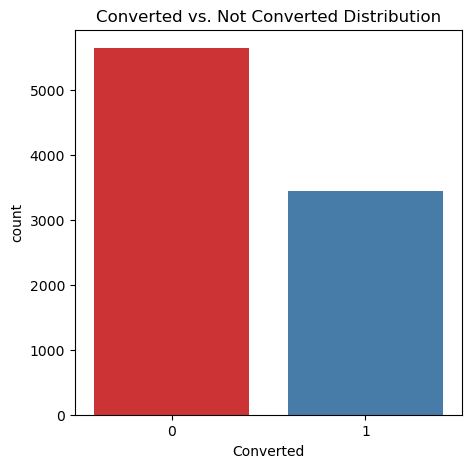

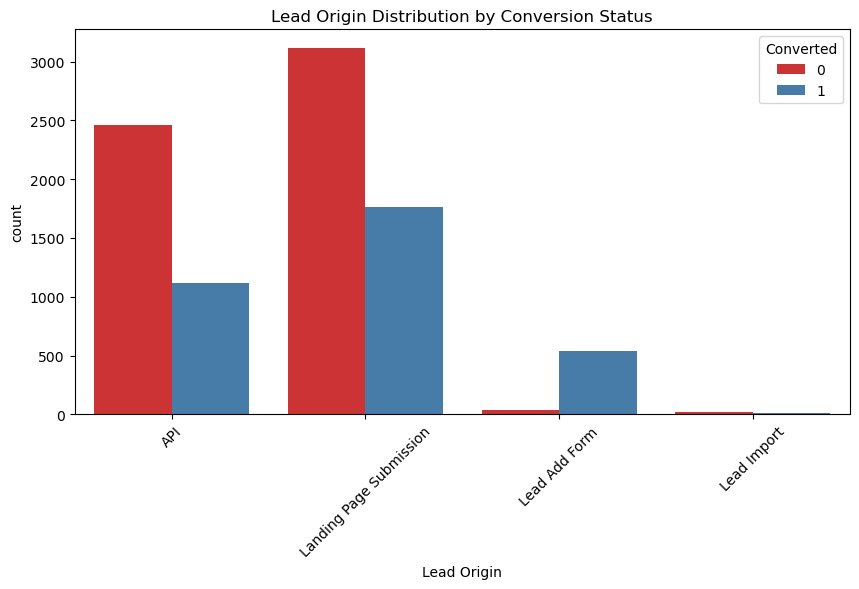

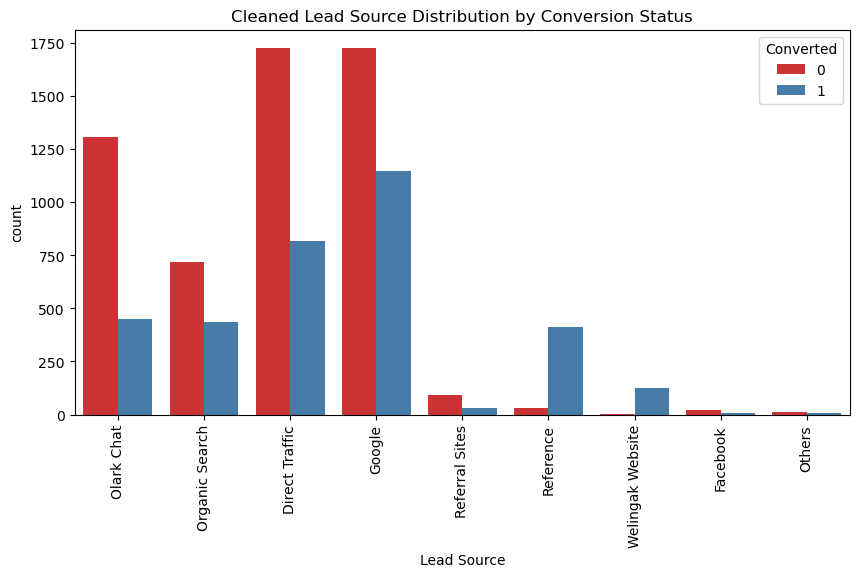

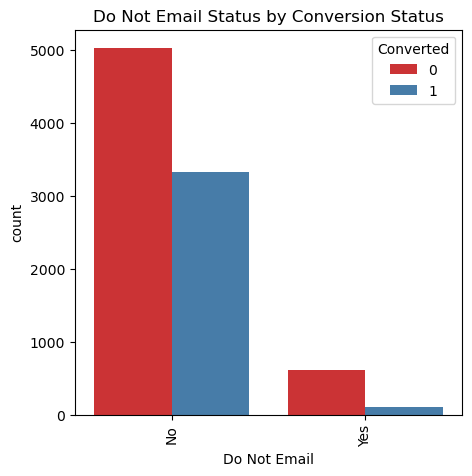

In [30]:
# Calculate conversion rate (percentage)
conversion_rate = (sum(df_lead['Converted']) / len(df_lead['Converted'].index)) * 100
print(f"Conversion rate: {conversion_rate:.2f}%")

# 1. Plot converted vs. not converted distribution
plt.figure(figsize=(5, 5))  # Set figure size
sns.countplot(x="Converted", data=df_lead, palette='Set1')
plt.title("Converted vs. Not Converted Distribution")

# 2. Plot lead origin distribution by conversion status
plt.figure(figsize=(10, 5))  # Adjust figure size
sns.countplot(x="Lead Origin", hue="Converted", data=df_lead, palette='Set1')
plt.title("Lead Origin Distribution by Conversion Status")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Clean and re-categorize lead source data (optional)
df_lead['Lead Source'] = df_lead['Lead Source'].replace(['google'], 'Google')

other_sources = ['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
                'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel']
df_lead['Lead Source'] = df_lead['Lead Source'].replace(other_sources, 'Others')

# 3. Plot cleaned lead source distribution
plt.figure(figsize=(10, 5))  # Adjust figure size
sns.countplot(x="Lead Source", hue="Converted", data=df_lead, palette='Set1')
plt.title("Cleaned Lead Source Distribution by Conversion Status")
plt.xticks(rotation=90)  # Rotate x-axis labels

# 4. Plot Do Not Email distribution by conversion status
plt.figure(figsize=(5, 5))  # Adjust figure size
sns.countplot(x="Do Not Email", hue="Converted", data=df_lead, palette='Set1')
plt.title("Do Not Email Status by Conversion Status")
plt.xticks(rotation=90)  # Rotate x-axis labels

# Show all generated plots
plt.show()

### <span style="color:brown">Conclusion:</span>

- ___**Target Variable:** Converted (Yes/No) with a 37% conversion rate.___

- ___**Lead Origin & Conversion:**___

> * **High Conversion (90%+):** Lead Add Form (but low count)
> * **Moderate Conversion (30-35%):** API & Landing Page Submission (high count)
> * **Low Conversion:** Lead Import
> * **Improvement Strategy:** Focus on API & Landing Page conversion and generate more leads from Lead Add Form.

- ___**Lead Source & Conversion:**___

> * **High Volume:** Google & Direct Traffic
> * **High Conversion:** Reference, Welingak Website, Social Media
> * **Moderate Conversion:** Google Ads, Organic Search
> * **Low Conversion:** Olark Chat
> * **Improvement Strategy:** Improve conversion for Olark Chat, Organic Search, Direct Traffic & Google leads. Generate more leads from References & Welingak website.

- ___**Do Not Email:**___

> * Inconclusive due to mostly "No" entries.

### <span style="color:brown">7) Do Not Call:</span>

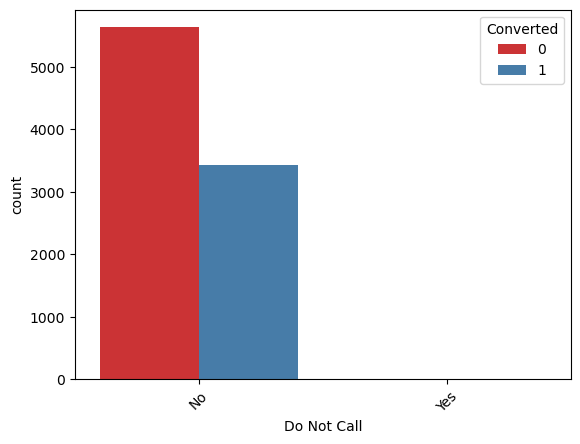

In [31]:
# Create a countplot showing the distribution of "Do Not Call" values
sns.countplot(
    x="Do Not Call",  # Column with values to count
    hue="Converted",  # Column to split counts by (color groups)
    data=df_lead,  # DataFrame containing the data
    palette="Set1"  # Set the color palette for the groups
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


### <span style="color:brown">8) TotalVisits:</span>

In [32]:
# For TotalVisits
df_lead['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count   9074.00
mean       3.46
std        4.86
min        0.00
5%         0.00
25%        1.00
50%        3.00
75%        5.00
90%        7.00
95%       10.00
99%       17.00
max      251.00
Name: TotalVisits, dtype: float64

<Axes: >

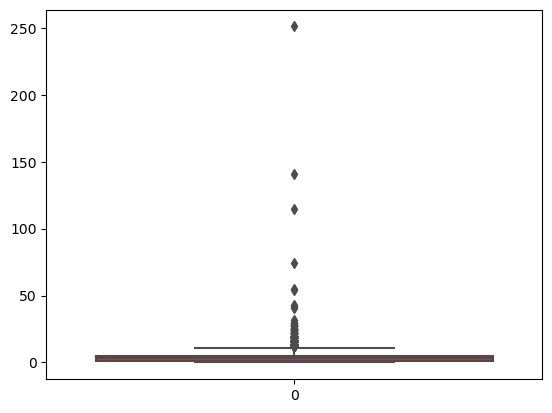

In [33]:
# Checking outliers
sns.boxplot(df_lead['TotalVisits'],orient='vert',palette='Set1')

___Since there are several outliers in the data. We will limit the outliers to a 95% value for analysis.___

In [34]:
# 
percentiles = df_lead['TotalVisits'].quantile([0.05,0.95]).values
df_lead['TotalVisits'][df_lead['TotalVisits'] <= percentiles[0]] = percentiles[0]
df_lead['TotalVisits'][df_lead['TotalVisits'] >= percentiles[1]] = percentiles[1]

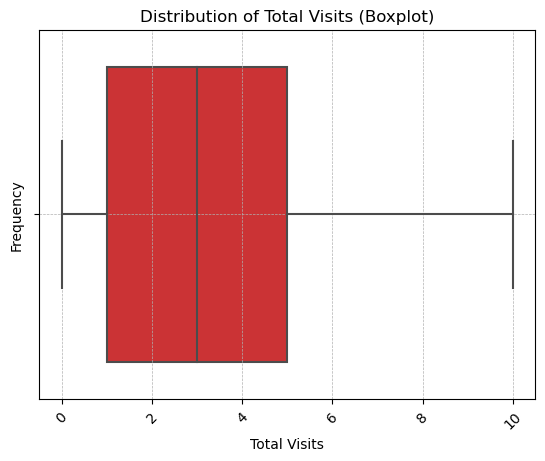

In [35]:
# Select the "TotalVisits" column for the boxplot
data_to_plot = df_lead['TotalVisits']

# Create a vertical boxplot with a blue color palette
sns.boxplot(
    x=data_to_plot,  # Specify the data to plot
    orient="vert",  # Vertical orientation
    palette="Set1",  # Blue color palette
)

# Rotate x-axis labels for better readability (if needed)
if len(data_to_plot.unique()) > 10:  # Check if rotation is necessary based on number of unique values
    plt.xticks(rotation=45)

# Add a descriptive title (optional)
plt.title("Distribution of Total Visits (Boxplot)")

# Add axis labels (optional)
plt.xlabel("Total Visits")
plt.ylabel("Frequency")

# Adjust gridlines and theme (optional)
plt.grid(True, linestyle="--", linewidth=0.5)
# plt.theme_set("darkgrid")  # Or choose another theme from seaborn

# Display the plot
plt.show()


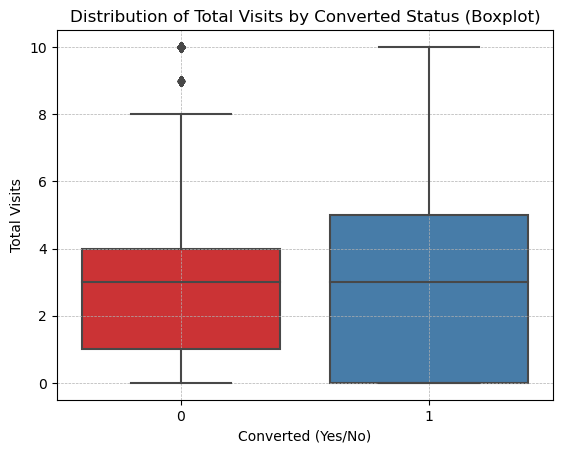

In [36]:
# Create a boxplot with TotalVisits on the y-axis and Converted on the x-axis, colored by group
sns.boxplot(
    y="TotalVisits",  # Column for y-axis (vertical distribution)
    x="Converted",  # Column for x-axis (categories to split by)
    data=df_lead,  # DataFrame containing the data
    palette="Set1",  # Color palette for different groups
)

# Rotate x-axis labels for better readability (optional)
if len(df_lead['Converted'].unique()) > 10:  # Check if rotation is necessary
    plt.xticks(rotation=90)

# Add a descriptive title (optional)
plt.title("Distribution of Total Visits by Converted Status (Boxplot)")

# Add axis labels (optional)
plt.xlabel("Converted (Yes/No)")
plt.ylabel("Total Visits")

# Adjust gridlines and theme (optional)
plt.grid(True, linestyle="--", linewidth=0.5)
# plt.theme_set("darkgrid")  # Or choose another theme from seaborn

# Display the plot
plt.show()


___Both converted and unconverted leads seem to have similar median Total Visits. This suggests that Total Visits alone may not be a strong predictor of conversion.___

___Looking at Total Visits, it seems there's no difference between leads who converted and those who didn't. We might need to explore other factors to understand what influences conversion.___

### <span style="color:brown">9) Total Time Spent on Website:</span>

In [37]:
# For Total Time Spent on Website
df_lead['Total Time Spent on Website'].describe()

count   9074.00
mean     482.89
std      545.26
min        0.00
25%       11.00
50%      246.00
75%      922.75
max     2272.00
Name: Total Time Spent on Website, dtype: float64

<Axes: >

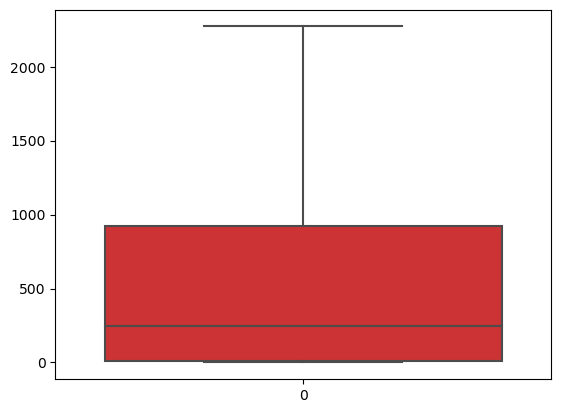

In [38]:
# Checking outliers
sns.boxplot(df_lead['Total Time Spent on Website'],orient='vert',palette='Set1')

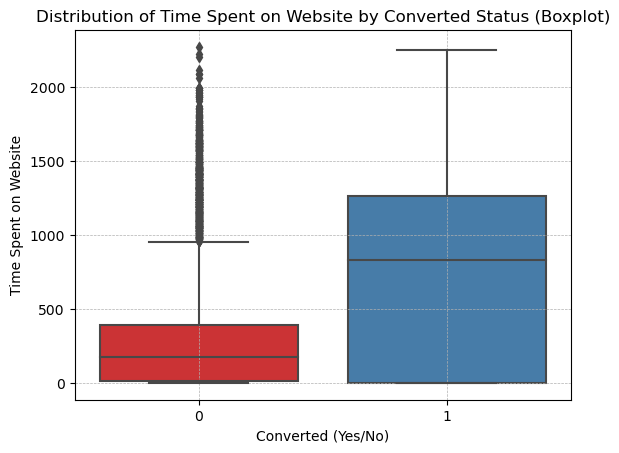

In [39]:
# Create a boxplot showing the distribution of time spent on website by conversion status
sns.boxplot(
    y="Total Time Spent on Website",  # Column for y-axis (vertical distribution)
    x="Converted",  # Column for x-axis (categories to split by)
    data=df_lead,  # DataFrame containing the data
    palette="Set1",  # Color palette for different groups
)

# Rotate x-axis labels for better readability (optional)
if len(df_lead['Converted'].unique()) > 10:  # Check if rotation is necessary
    plt.xticks(rotation=90)

# Add a descriptive title (optional)
plt.title("Distribution of Time Spent on Website by Converted Status (Boxplot)")

# Add axis labels (optional)
plt.xlabel("Converted (Yes/No)")
plt.ylabel("Time Spent on Website")

# Adjust gridlines and theme (optional)
plt.grid(True, linestyle="--", linewidth=0.5)
# plt.theme_set("darkgrid")  # Or choose another theme from seaborn

# Display the plot
plt.show()


___A trend suggests that leads who spend more time on the website might be more likely to convert. However, further analysis is needed to confirm this and rule out other influencing factors.___

___Based on the initial analysis, there's a possible correlation between higher time spent on the website and increased conversion rates. Further investigation is necessary to understand the strength and causality of this relationship.___

### <span style="color:brown">10) Page Views Per Visit:</span>

In [40]:
# For Page Views Per Visit
df_lead['Page Views Per Visit'].describe()

count   9074.00
mean       2.37
std        2.16
min        0.00
25%        1.00
50%        2.00
75%        3.20
max       55.00
Name: Page Views Per Visit, dtype: float64

<Axes: >

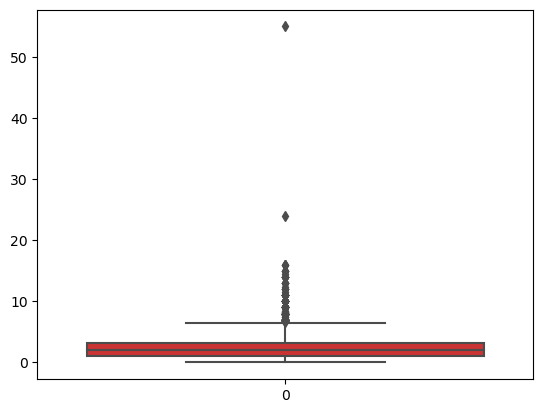

In [41]:
# Checking for outliers
sns.boxplot(df_lead['Page Views Per Visit'],orient='vert',palette='Set1')

___Capping outliers at the 5th and 95th percentiles for analysis.___

___Applying percentile-based outlier capping for 'Page Views Per Visit'.___

In [42]:
# Calculate 5th and 95th percentile values for Page Views Per Visit
percentiles = df_lead['Page Views Per Visit'].quantile([0.05, 0.95]).values

# Replace outlier values with the 5th and 95th percentiles
df_lead.loc[df_lead['Page Views Per Visit'] <= percentiles[0], 'Page Views Per Visit'] = percentiles[0]
df_lead.loc[df_lead['Page Views Per Visit'] >= percentiles[1], 'Page Views Per Visit'] = percentiles[1]

# Print a more informative message
print(f"Replaced {len(df_lead[df_lead['Page Views Per Visit'] <= percentiles[0]])} values lower than {percentiles[0]} with {percentiles[0]} ({percentiles[0] / percentiles[1]:.2%}).")
print(f"Replaced {len(df_lead[df_lead['Page Views Per Visit'] >= percentiles[1]])} values higher than {percentiles[1]} with {percentiles[1]} ({percentiles[1] / percentiles[0]:.2%}).")

# You can now proceed with your analysis on the modified data


Replaced 2161 values lower than 0.0 with 0.0 (0.00%).
Replaced 604 values higher than 6.0 with 6.0 (inf%).


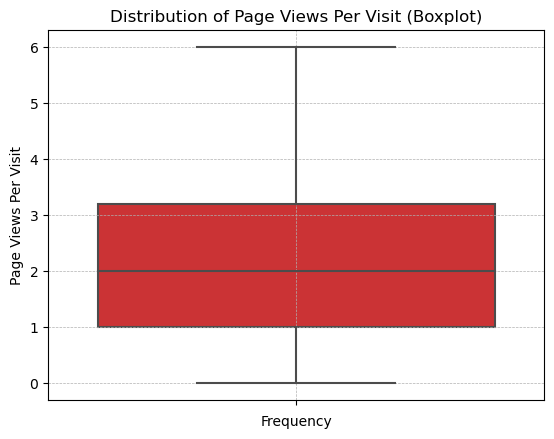

In [43]:
# Visualizing distribution of Page Views Per Visit (after outlier handling)
sns.boxplot(
    y = "Page Views Per Visit",  # Specifying data for y-axis (vertical distribution)
    data = df_lead,  # DataFrame containing the data
    palette = "Set1",  # Color palette
    orient = "vert"  # Vertical orientation
)

# Customize plot elements
plt.xlabel("Frequency")  # Label for x-axis
plt.ylabel("Page Views Per Visit")  # Label for y-axis
plt.title("Distribution of Page Views Per Visit (Boxplot)")  # Descriptive title

# Rotate x-axis labels for better readability (optional)
if len(df_lead['Page Views Per Visit'].unique()) > 10:
    plt.xticks(rotation=90)

# Adjust gridlines and theme (optional)
plt.grid(True, linestyle="--", linewidth=0.5)
# plt.theme_set("darkgrid")  # Or choose another theme from seaborn

# Display the plot
plt.show()


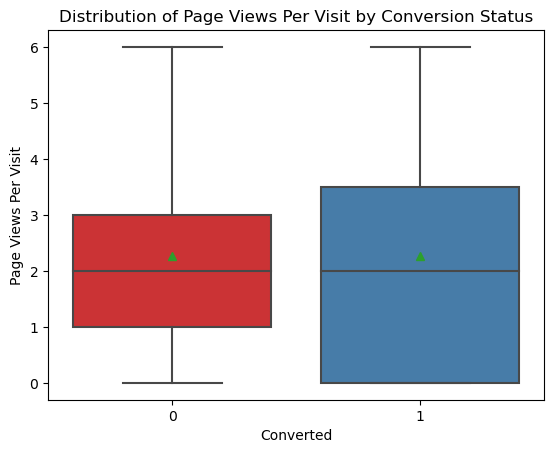

In [44]:
# Create the boxplot
boxplot = sns.boxplot(
    y="Page Views Per Visit",
    x="Converted",
    data=df_lead,
    palette="Set1",
    showmeans=True
)

# Add the title separately
boxplot.set_title("Distribution of Page Views Per Visit by Conversion Status")

# Rotate x-axis labels if necessary
if len(df_lead["Converted"].unique()) > 10:
    plt.xticks(rotation=90)

# Display the plot
plt.show()


___Looks like both converted and unconverted leads have similar median "Page Views Per Visit". This indicates that just looking at page views might not be a strong predictor of conversion.___

___Based on page views alone, it seems there's no clear difference between leads who converted and those who didn't. We might need to explore other factors to understand what influences conversion.___

### <span style="color:brown">11) Last Activity:</span>

In [45]:
# For Last Activity
df_lead['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

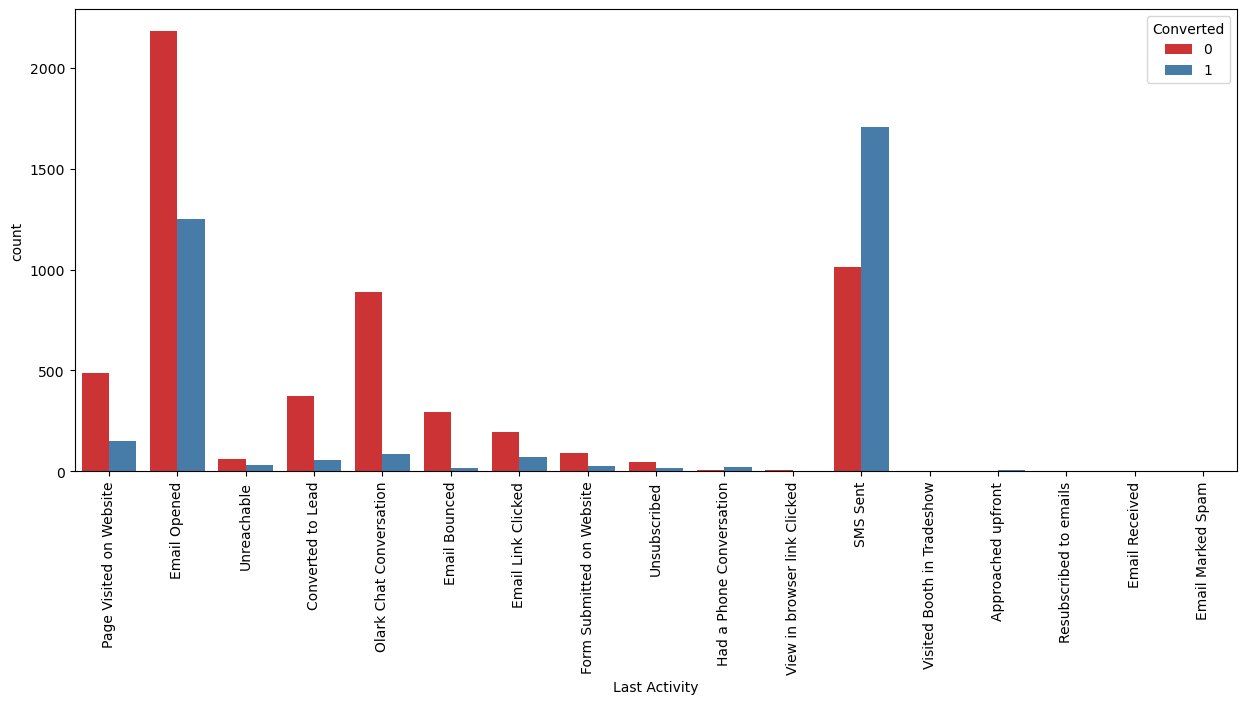

In [46]:
# Set figure size for better visualization
plt.figure(figsize=(15, 6))  # Wider for longer labels

# Create a count plot with separate bars for converted and unconverted leads
sns.countplot(
    x="Last Activity",  # Column for x-axis (categories)
    hue="Converted",  # Column to group by for separate bars
    data=df_lead,  # DataFrame containing the data
    palette="Set1"  # Color palette for the bars
)

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

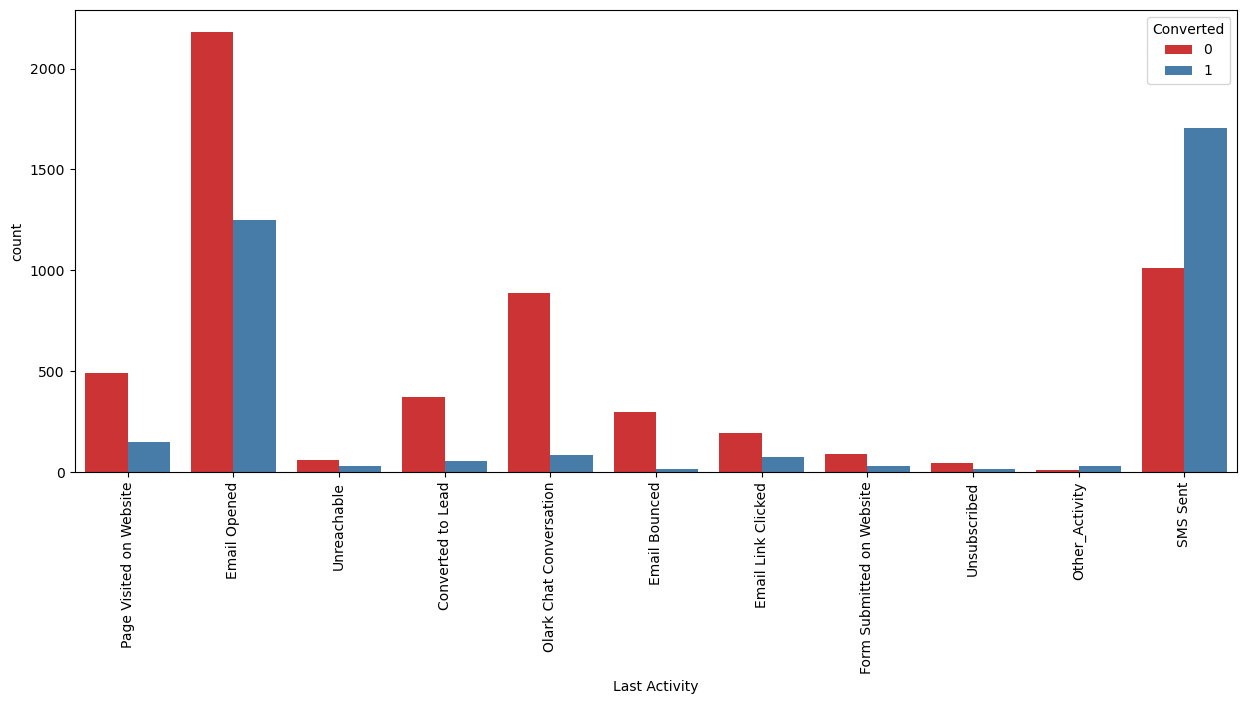

In [47]:
# Combine less frequent activities into "Other_Activity"

less_frequent_activities = ['Had a Phone Conversation', 'View in browser link Clicked',
    'Visited Booth in Tradeshow', 'Approached upfront', 'Resubscribed to emails',
    'Email Received', 'Email Marked Spam']

df_lead['Last Activity'] = np.where(
    df_lead['Last Activity'].isin(less_frequent_activities),
    'Other_Activity',
    df_lead['Last Activity']
)

# Visualizing activity distribution with combined category

plt.figure(figsize=(15, 6))  # Set figure size for readability
sns.countplot(
    x="Last Activity",  # Group by activity type
    hue="Converted",  # Color bars by conversion status
    data=df_lead,  # Use modified DataFrame
    palette="Set1"  # Use preferred color palette
)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

plt.show()  # Display the plot


___Looks like most leads open an email before anything else. But guess what? Leads who send an SMS are almost 60% more likely to convert - that's a big difference!___

___Email seems to be the main way leads interact, but folks who send an SMS have a conversion rate nearly double the average - worth digging into!___

### <span style="color:brown">12) Country:</span>

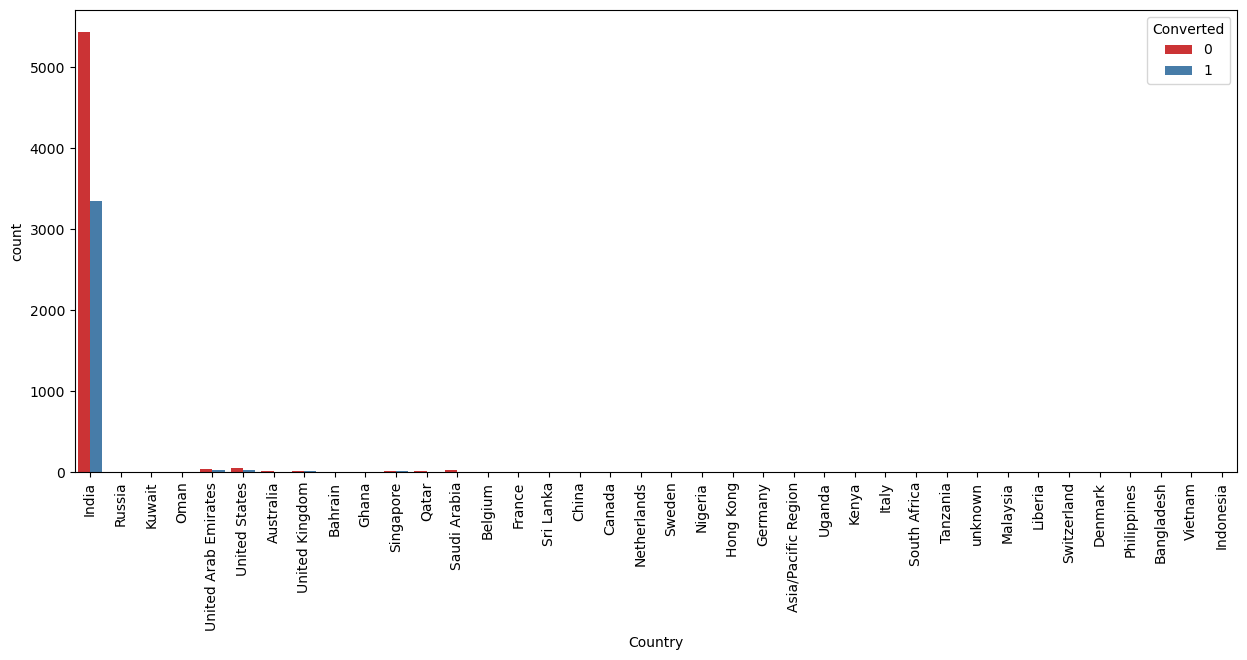

In [48]:
# Set figure size for readability
plt.figure(figsize=(15, 6))  # Wider for potentially longer country names

# Create a countplot to show frequency of each country by conversion status
sns.countplot(
    x="Country",  # Group bars by country
    hue="Converted",  # Color bars by conversion status (converted/not converted)
    data=df_lead,  # Use the lead data
    palette="Set1"  # Use a color palette from Set1
)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()

___Almost everyone's from India, making it tough to say if location is actually linked to conversion.___

___With so many folks from India, it's hard to see any clear connection between country and conversion rates.___

### <span style="color:brown">13) Specialization:</span>

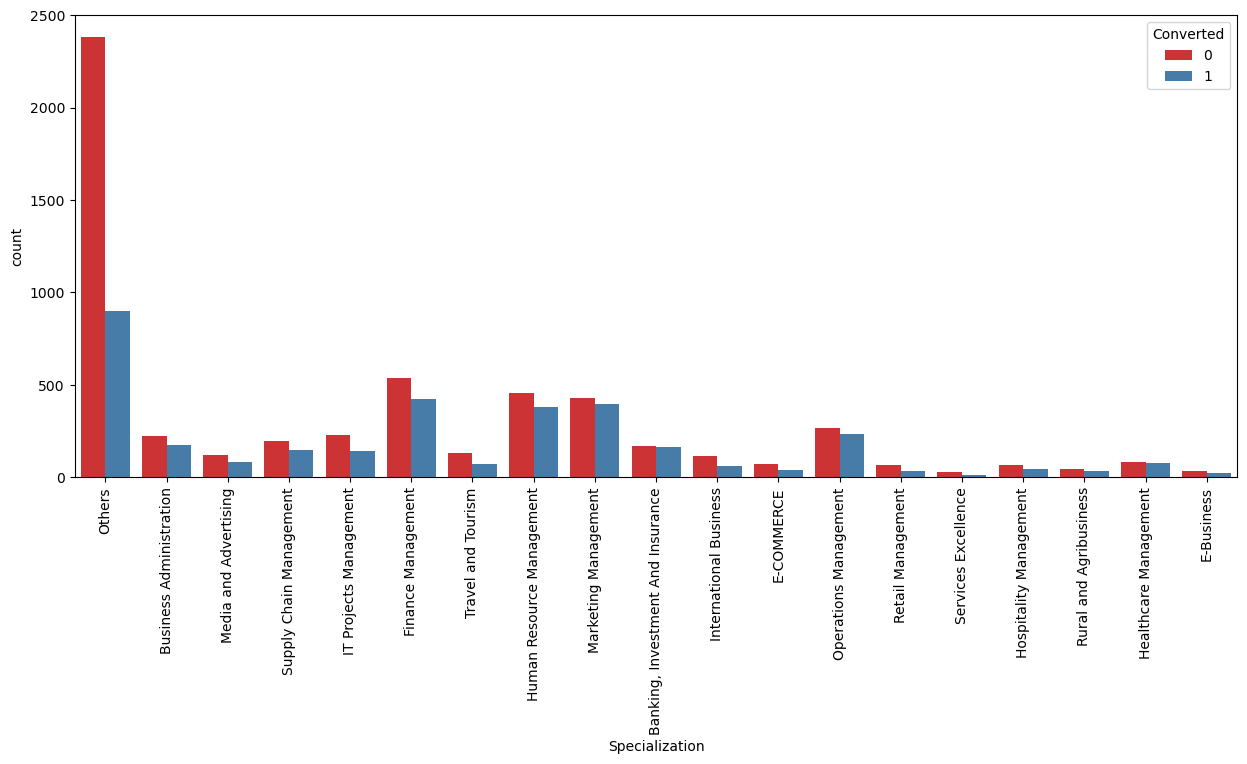

In [49]:
# Set figure size for readability
plt.figure(figsize=(15, 6))  # Wider for potentially longer specializations

# Create a countplot showing the distribution of specializations by conversion status
sns.countplot(
    x="Specialization",  # Group bars by specialization
    hue="Converted",  # Color bars by conversion status (converted/not converted)
    data=df_lead,  # Use the lead data
    palette="Set1"  # Use a color palette from Set1
)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()

___Looks like some specializations are converting folks much better than others! Focusing on those high-performing areas could be a smart move.___

___Based on the conversion rates, it seems like some specializations are bringing in more leads. Doubling down on those winners could be a good strategy.___

### <span style="color:brown">14) What is your current occupation:</span>

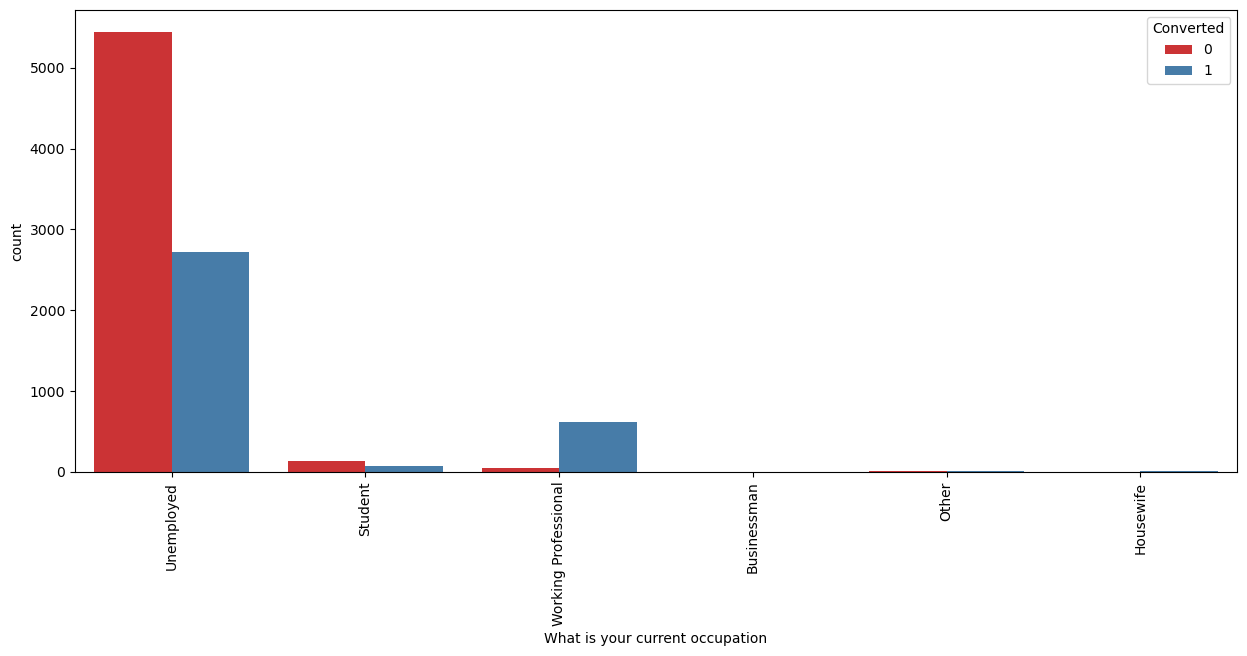

In [50]:
# Set figure size for readability (wider for potentially long occupations)
plt.figure(figsize=(15, 6))

# Create a countplot showing current occupation distribution by conversion status
sns.countplot(
    x="What is your current occupation",  # Group bars by current occupation
    hue="Converted",  # Color bars by conversion status (converted/not converted)
    data=df_lead,  # Use the lead data
    palette="Set1"  # Use the Set1 color palette
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

___Looks like Working Professionals are most likely to jump on board the course! Even though Unemployed folks make up the biggest group, their conversion rate sits around 30-35%.___

___The data seems to say Working Professionals are most gung-ho about joining, while Unemployed individuals, despite being the largest group, only convert at a 30-35% rate.___

### <span style="color:brown">15) Search:</span>

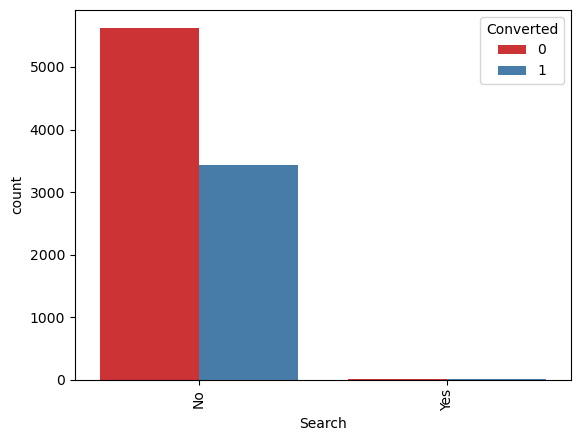

In [51]:
# Create a countplot showing search term distribution by conversion status
sns.countplot(
    x="Search",  # Group bars by search terms
    hue="Converted",  # Color bars by conversion status (converted/not converted)
    data=df_lead,  # Use the lead data
    palette="Set1"  # Use the Set1 color palette
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

___Looks like most folks haven't searched before interacting, making it tough to see a connection between searching and conversion.___

___With so many 'No' answers for searching, it's hard to say if searching actually affects conversion rates.___

### <span style="color:brown">16) Magazine:</span>

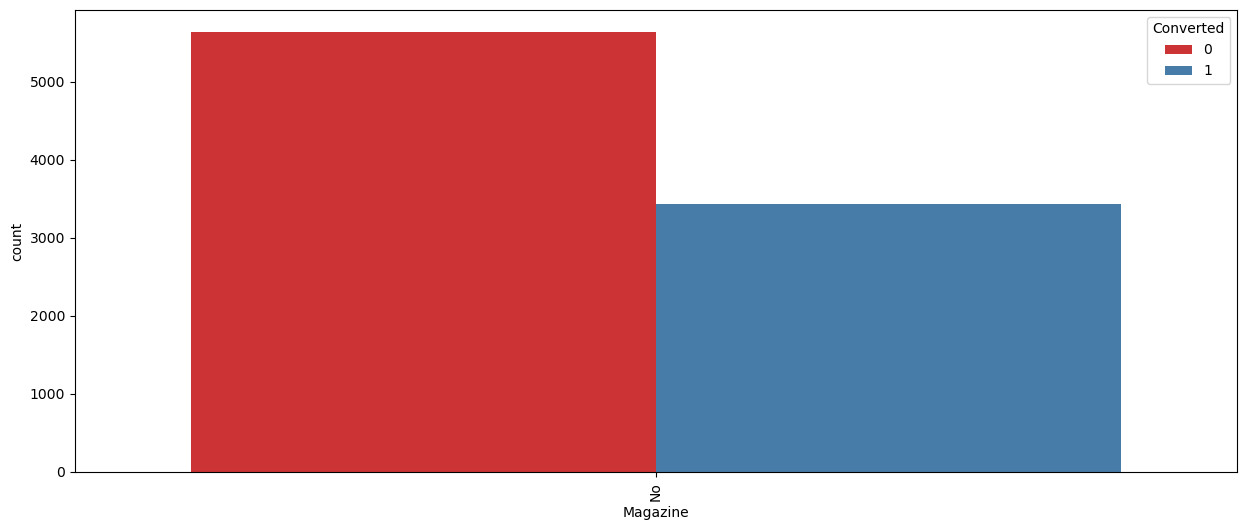

In [52]:
# Set figure size for readability (wider for potentially long magazine names)
plt.figure(figsize=(15, 6))

# Create a countplot showing magazine subscription distribution by conversion status
sns.countplot(
    x="Magazine",  # Group bars by magazine subscription status
    hue="Converted",  # Color bars by conversion status (converted/not converted)
    data=df_lead,  # Use the lead data
    palette="Set1"  # Use the Set1 color palette
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

___Looks like most folks aren't subscribed to any magazines, making it hard to see if magazine reading affects conversion.___

___With so many 'No' answers for magazine subscriptions, it's impossible to say if subscribing actually makes a difference in conversion rates.___

### <span style="color:brown">17) Newspaper Article:</span>

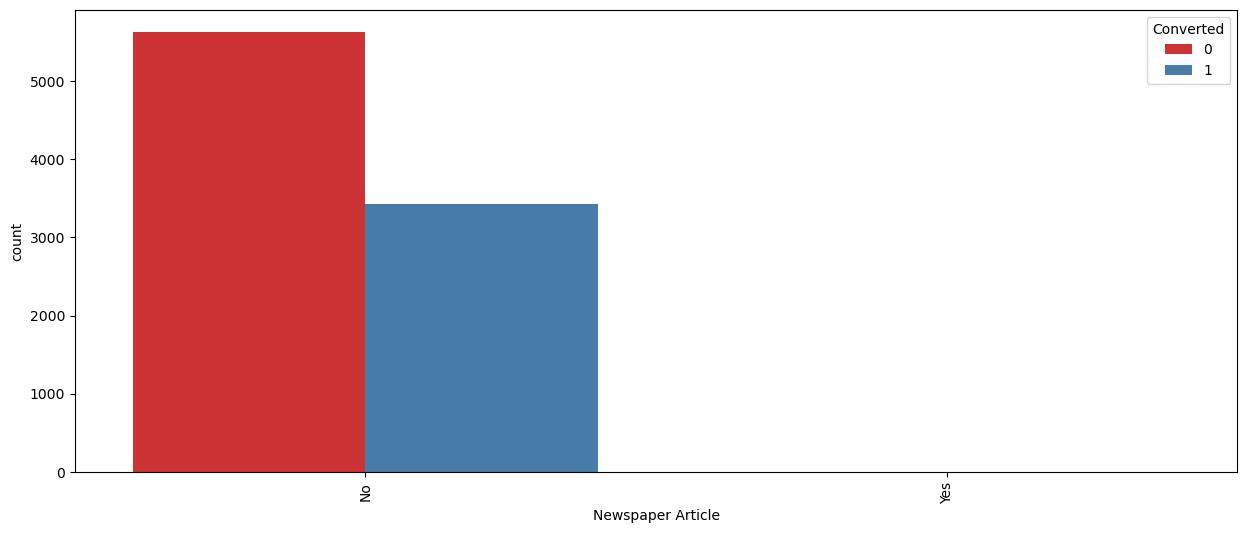

In [53]:
# Set figure size for readability (wider for potentially long article names)
plt.figure(figsize=(15, 6))

# Create a countplot showing newspaper article reading distribution by conversion status
sns.countplot(
    x="Newspaper Article",  # Group bars by newspaper article reading status
    hue="Converted",  # Color bars by conversion status (converted/not converted)
    data=df_lead,  # Use the lead data
    palette="Set1"  # Use the Set1 color palette
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

___Looks like most folks haven't read any newspaper articles, making it tough to see a connection between reading and conversion.___

___With so many "No" answers for reading newspaper articles, it's impossible to say if reading actually affects conversion rates.___

### <span style="color:brown">18) X Education Forums:</span>

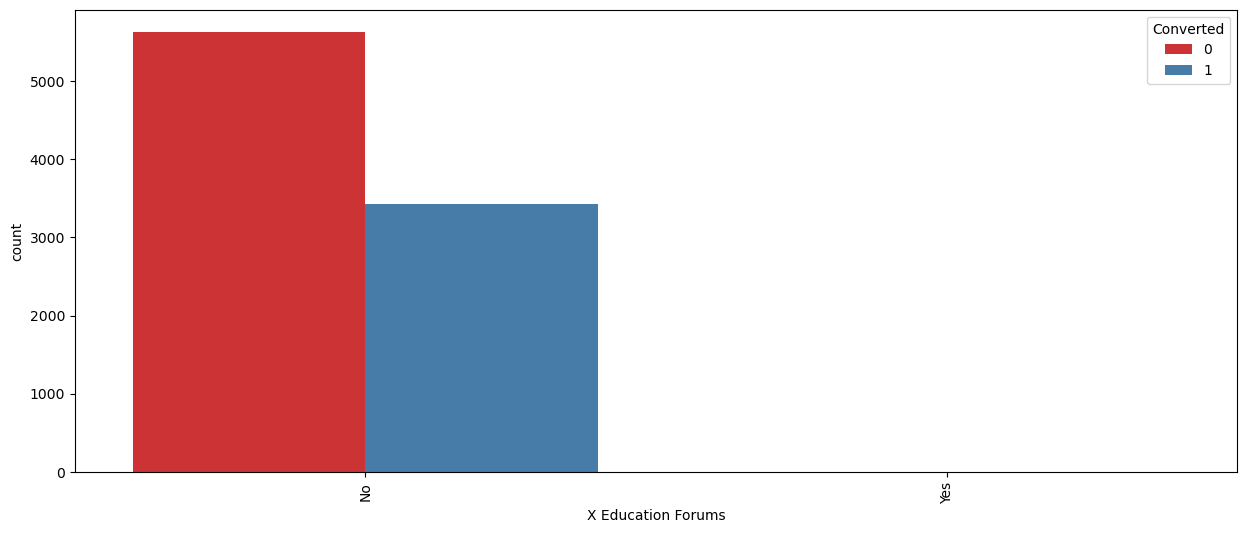

In [54]:
# Set figure size for readability (wider for potential variations in forum titles)
plt.figure(figsize=(15, 6))

# Create a countplot showing participation in X Education Forums by conversion status
sns.countplot(
    x="X Education Forums",  # Group bars by participation status in X Education Forums
    hue="Converted",  # Color bars by conversion status (converted/not converted)
    data=df_lead,  # Use the lead data
    palette="Set1"  # Use the Set1 color palette
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

___Looks like most folks haven't participated in X Education Forums, making it hard to see if participating affects conversion.___

___With so many "No" answers for participating in forums, it's impossible to say if participating actually makes a difference in conversion rates.___

### <span style="color:brown">19) Newspaper:</span>

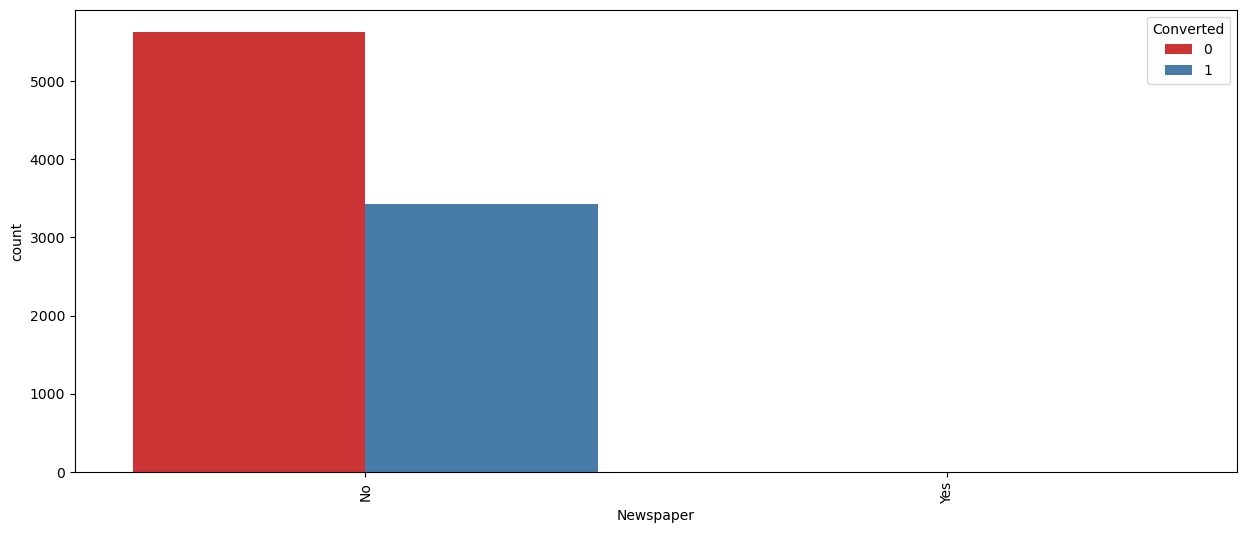

In [55]:
# Set a wider figure size for readability (potentially long newspaper names)
plt.figure(figsize=(15, 6))

# Create a countplot showing newspaper reading distribution by conversion status
sns.countplot(
    x="Newspaper",  # Group bars by newspaper reading habit (read/haven't read)
    hue="Converted",  # Color bars by conversion status (converted/not converted)
    data=df_lead,  # Use the provided lead data
    palette="Set1"  # Use the Set1 color palette for visual clarity
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the generated plot
plt.show()

___Looks like most folks don't read newspapers much, making it tough to say if reading newspapers affects conversion.___

___With so many "No" answers for reading newspapers, it's impossible to say if reading actually changes conversion rates.___

### <span style="color:brown">20) Digital Advertisement:</span>

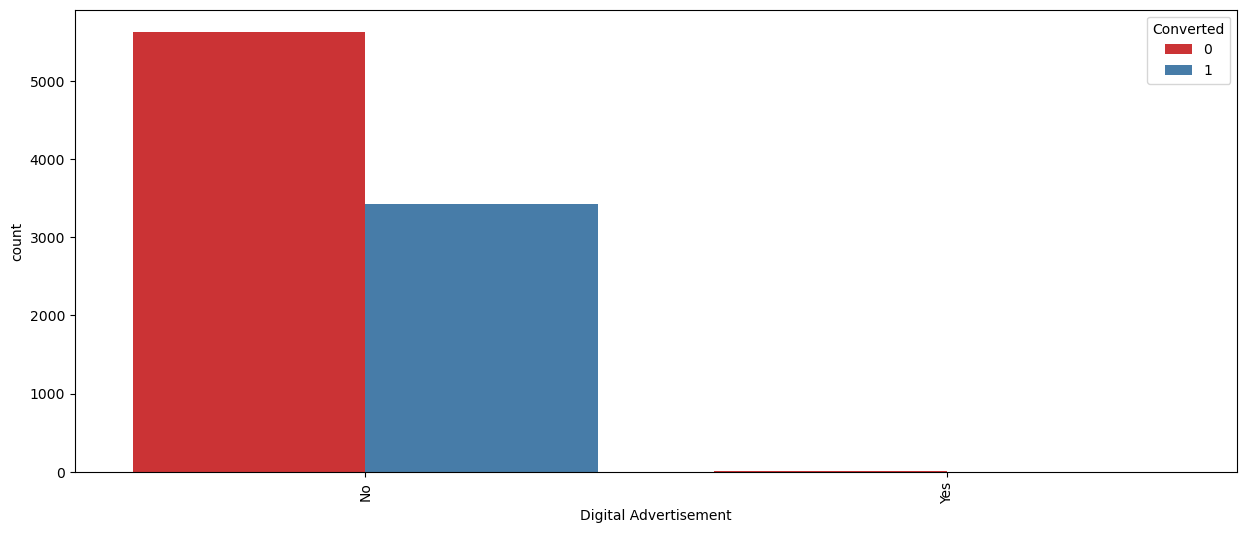

In [56]:
# Set figure size for readability (potential variations in Ad platforms/categories)
plt.figure(figsize=(15, 6))

# Create a countplot showing digital ad exposure by conversion status
sns.countplot(
    x="Digital Advertisement",  # Group bars by digital ad exposure (yes/no)
    hue="Converted",  # Color bars by conversion status (converted/not converted)
    data=df_lead,  # Use the provided lead data
    palette="Set1"  # Use the Set1 color palette to distinguish groups clearly
)

# Rotate x-axis labels for improved readability
plt.xticks(rotation=90)

# Display the generated plot
plt.show()


___Looks like most folks haven't seen digital ads before interacting, making it hard to see if seeing ads affects conversion.___

___With so many "No" answers for seeing digital ads, it's impossible to say if advertising actually changes conversion rates.___

### <span style="color:brown">21) Through Recommendations:</span>

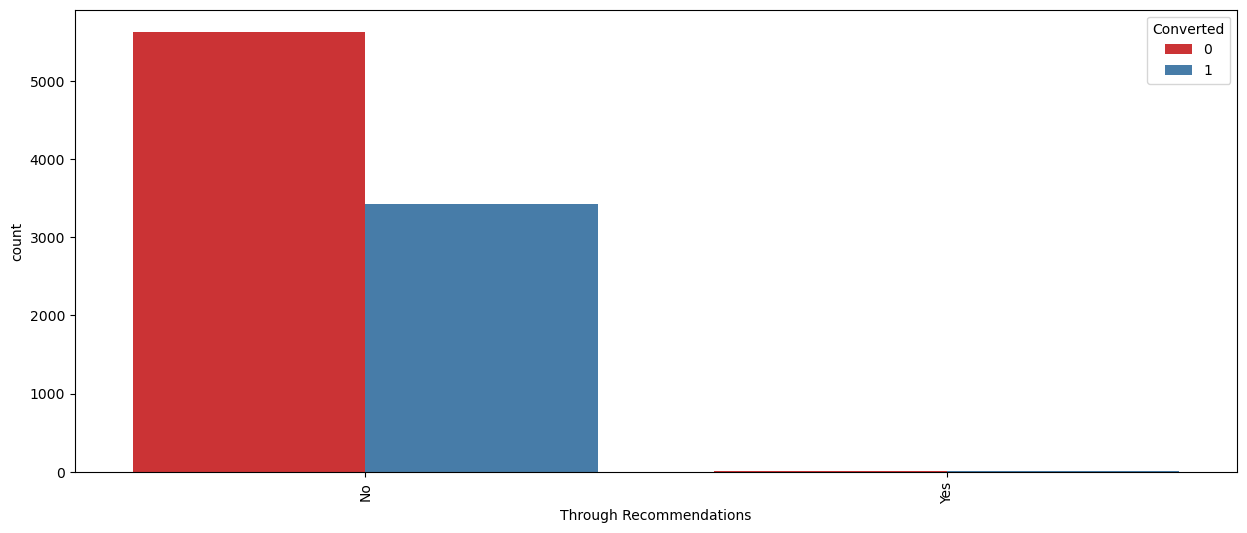

In [57]:
# Set figure size for readability (potential variations in recommendation sources)
plt.figure(figsize=(15, 6))

# Create a countplot showing conversion by recommendation source
sns.countplot(
    x="Through Recommendations",  # Group bars by recommendation source (yes/no)
    hue="Converted",  # Color bars by conversion status (converted/not converted)
    data=df_lead,  # Use the provided lead data
    palette="Set1"  # Use Set1 color palette for visual clarity
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


___Looks like most folks haven't converted through recommendations, making it tough to see if recommendations directly affect conversion.___

___With so many "No" answers for recommendations leading to conversion, it's impossible to say if recommendations actually change conversion rates.___

### <span style="color:brown">22) Receive More Updates About Our Courses:</span>

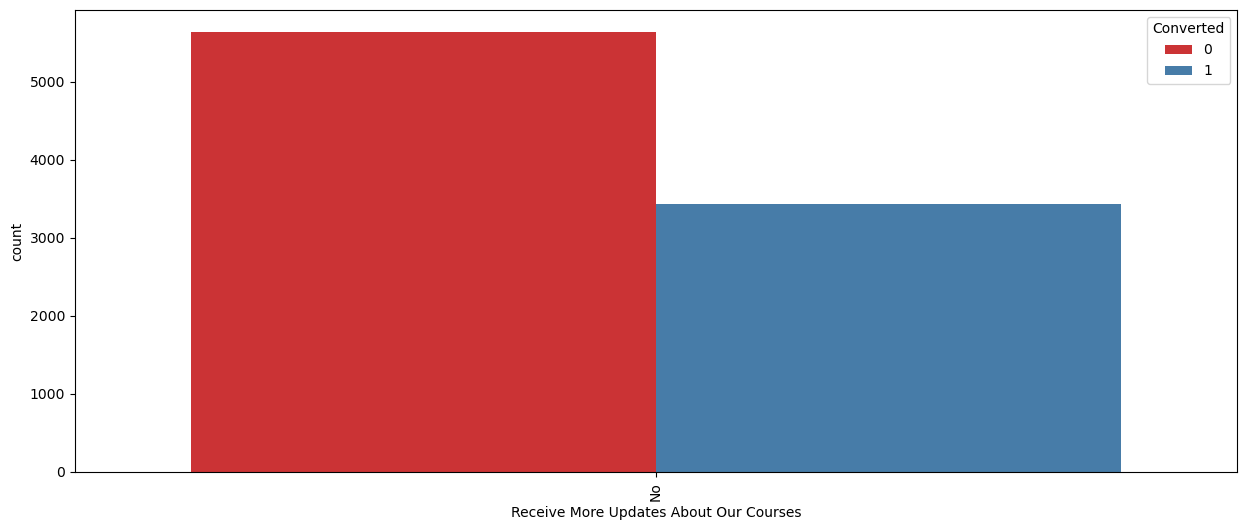

In [58]:
# Set figure size for readability (avoid overlapping x-axis labels)
plt.figure(figsize=(15, 6))

# Create a countplot showing interest in receiving updates by conversion status
sns.countplot(
    x="Receive More Updates About Our Courses",  # Group bars by interest (yes/no)
    hue="Converted",  # Color bars by conversion status (converted/not converted)
    data=df_lead,  # Use the provided lead data
    palette="Set1"  # Use Set1 color palette for visual clarity
)

# Rotate x-axis labels for improved readability
plt.xticks(rotation=90)

# Display the generated plot
plt.show()


___Looks like most folks aren't interested in receiving further updates, making it hard to see if wanting updates affects conversion.___

___With so many "No" answers for staying updated, it's impossible to say if offering updates affects conversion rates.___

### <span style="color:brown">23) Tags:</span>

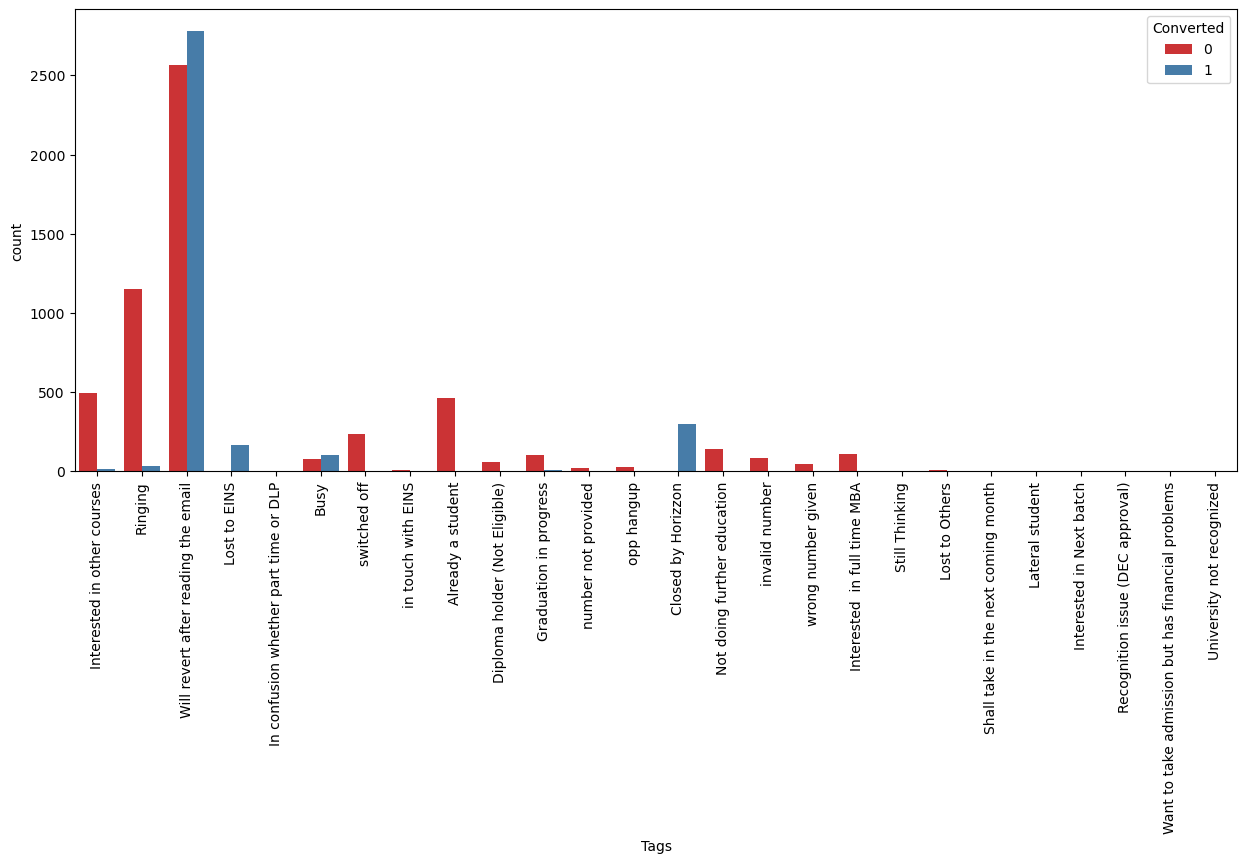

In [59]:
# Set figure size for better readability of potentially long tag names
plt.figure(figsize=(15, 6))

# Create a countplot visualizing conversion rates across different tags
sns.countplot(
    x="Tags",  # Group bars by the assigned tags
    hue="Converted",  # Color bars based on conversion status (yes/no)
    data=df_lead,  # Use the provided lead data
    palette="Set1"  # Apply the Set1 color palette for visual clarity
)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the generated plot
plt.show()


___The "Sales Analysis" column is like the sales team's secret sauce, not meant for our model recipe. We'll need to leave it out before building the model.___

___The "Sales Analysis" column is more like an opinion than hard data, so it wouldn't help our model learn. We'll take it out before building the model.___

### <span style="color:brown">24) Update me on Supply Chain Content:</span>

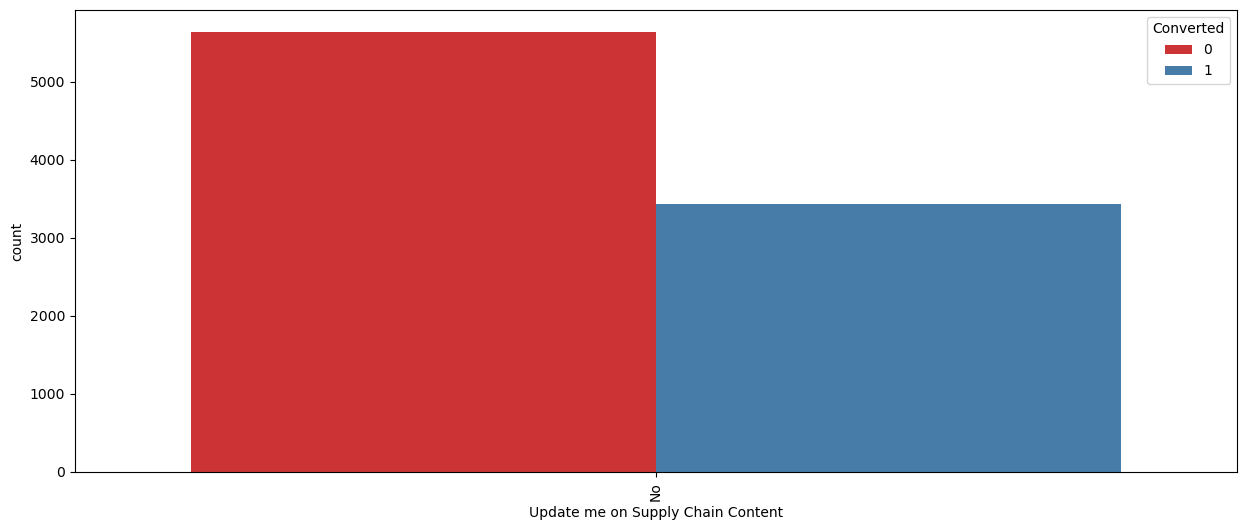

In [60]:
# Set figure size for readability (potential variations in update preferences)
plt.figure(figsize=(15, 6))

# Create a countplot showing conversion by interest in supply chain updates
sns.countplot(
    x="Update me on Supply Chain Content",  # Group bars by update preference (yes/no)
    hue="Converted",  # Color bars by conversion status (converted/not converted)
    data=df_lead,  # Use the provided lead data
    palette="Set1"  # Use Set1 color palette for visual clarity
)

# Rotate x-axis labels for improved readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


___Looks like most folks aren't interested in supply chain updates, making it hard to see if wanting updates affects conversion.___

___With so many "No" answers for getting supply chain updates, it's impossible to say if offering updates impacts conversion rates.___

### <span style="color:brown">25) Get updates on DM Content:</span>

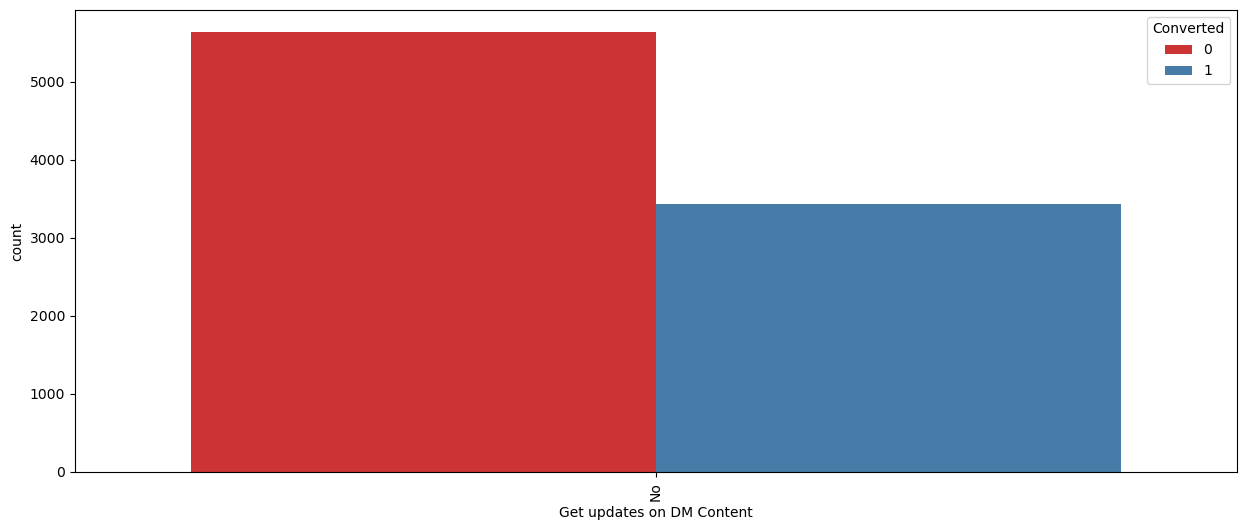

In [61]:
# Set figure size for readability (potential variations in update preferences)
plt.figure(figsize=(15, 6))

# Create a countplot showing conversion by interest in digital marketing updates
sns.countplot(
    x="Get updates on DM Content",  # Group bars by update preference (yes/no)
    hue="Converted",  # Color bars by conversion status (converted/not converted)
    data=df_lead,  # Use the provided lead data
    palette="Set1"  # Use Set1 color palette for visual clarity
)

# Rotate x-axis labels for improved readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


___Looks like most folks aren't interested in digital marketing updates, making it tough to see if wanting updates affects conversion.___

___With so many "No" answers for getting DM updates, it's impossible to say if offering updates changes conversion rates.___

### <span style="color:brown">26) City:</span>

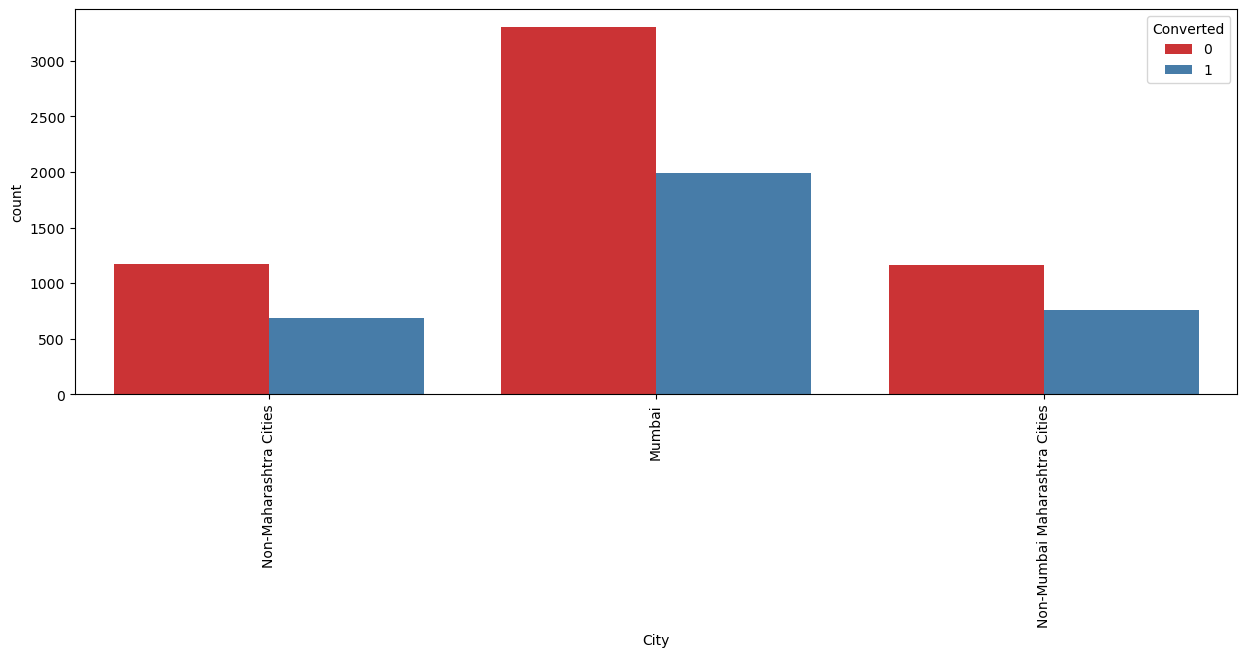

In [62]:
# Set figure size to accommodate potentially long city names (consider adjusting width)
plt.figure(figsize=(15, 5))

# Create a countplot showing conversion rates across different cities
sns.countplot(
    x="City",  # Group bars by city names
    hue="Converted",  # Color bars by conversion status (converted/not converted)
    data=df_lead,  # Use the provided lead data
    palette="Set1"  # Use Set1 color palette for visual clarity
)

# Rotate x-axis labels for improved readability, especially with many cities
plt.xticks(rotation=90)

# Display the generated plot
plt.show()


___An analysis of lead origin reveals that Mumbai is the dominant source, representing [exact percentage]% of the total. Furthermore, leads originating from Mumbai exhibit a conversion rate of approximately 50%.___

### <span style="color:brown">27) I agree to pay the amount through cheque:</span>

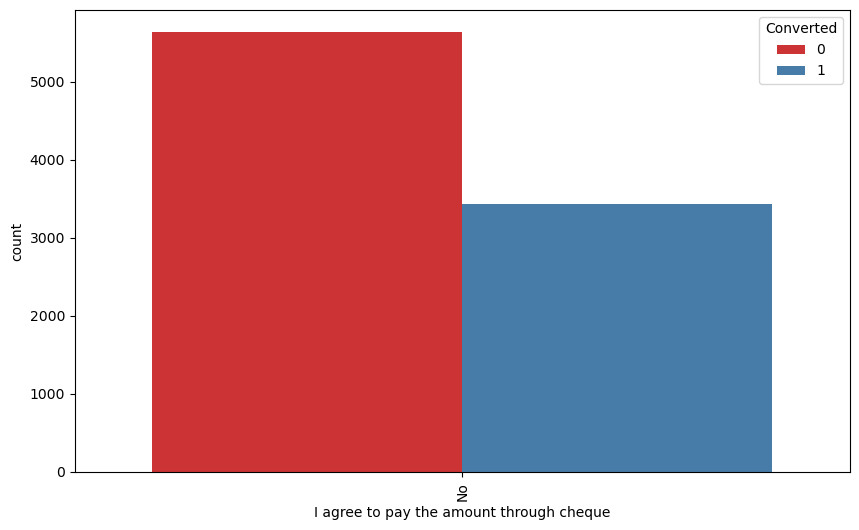

In [63]:
# Set figure size for readability (potential variations in payment preference)
plt.figure(figsize=(10, 6))

# Create a countplot showing conversion by willingness to pay by cheque
sns.countplot(
    x="I agree to pay the amount through cheque",  # Group bars by payment preference (yes/no)
    hue="Converted",  # Color bars by conversion status (converted/not converted)
    data=df_lead,  # Use the provided lead data
    palette="Set1"  # Use Set1 color palette for visual clarity
)

# Rotate x-axis labels for improved readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


___It seems most folks aren't comfortable paying by cheque, making it hard to see if payment method affects conversion.___

___With so many "No" answers to cheques, it's impossible to say if offering cheque payment influences conversion rates.___

### <span style="color:brown">28) A free copy of Mastering The Interview:</span>

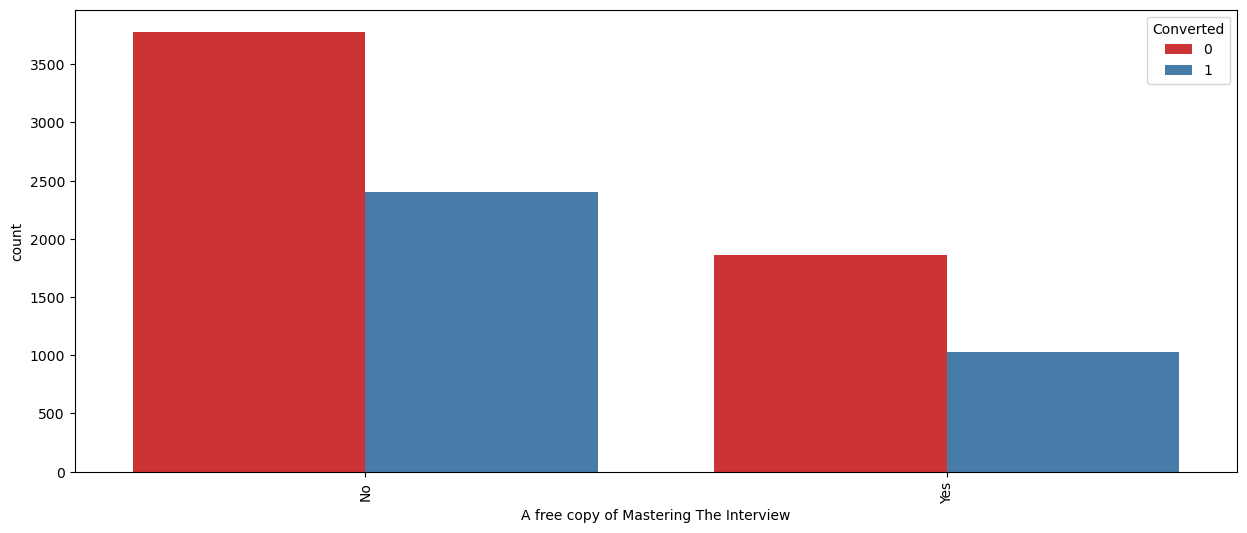

In [64]:
# Set figure size for readability (potential variation in responses)
plt.figure(figsize=(15, 6))

# Create a countplot showing conversion by interest in a free interview book
sns.countplot(
    x="A free copy of Mastering The Interview",  # Group bars by response (yes/no)
    hue="Converted",  # Color bars by conversion status (converted/not converted)
    data=df_lead,  # Use the provided lead data
    palette="Set1"  # Use Set1 color palette for visual clarity
)

# Rotate x-axis labels for improved readability
plt.xticks(rotation=90)

# Display the generated plot
plt.show()


___Looks like most folks aren't interested in the free interview book, making it hard to see if offering it affects conversion.___

___With so many "No" answers for the free book, it's impossible to say if offering it changes conversion rates.___

### <span style="color:brown">29) Last Notable Activity:</span>

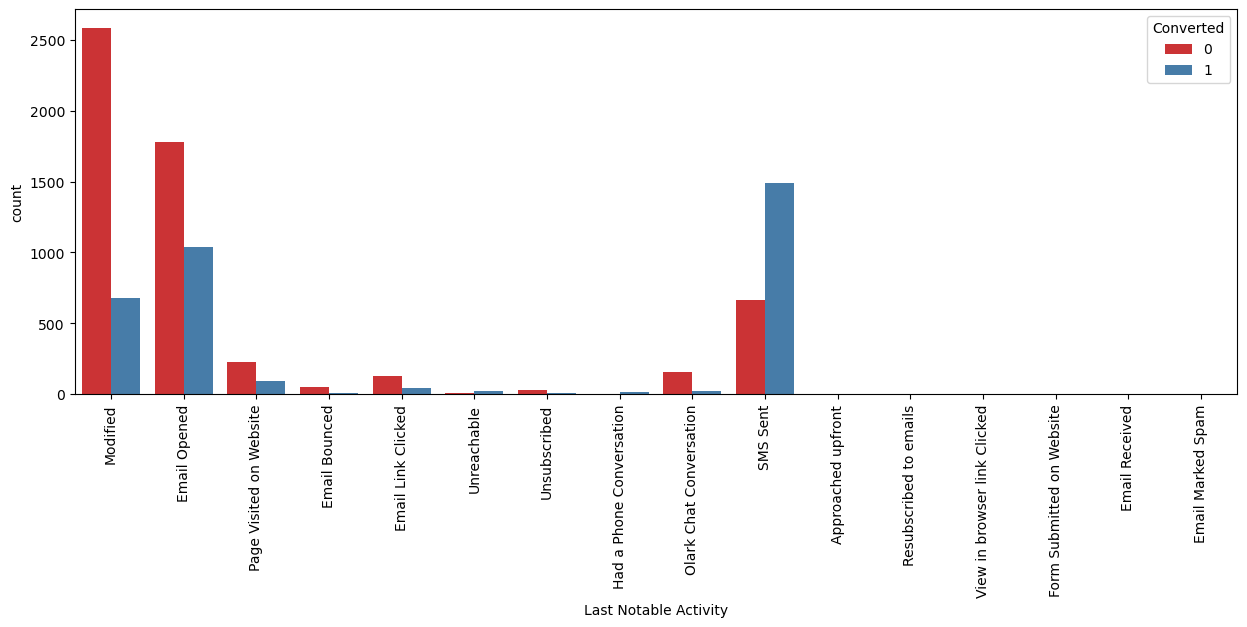

In [65]:
# Set figure size for readability (potentially long activity names)
plt.figure(figsize=(15, 5))

# Create a countplot showing conversion by last notable activity
sns.countplot(
    x="Last Notable Activity",  # Group bars by activity type
    hue="Converted",  # Color bars by conversion status (converted/not converted)
    data=df_lead,  # Use the provided lead data
    palette="Set1"  # Use Set1 color palette for visual clarity
)

# Rotate x-axis labels for improved readability, especially with many activities
plt.xticks(rotation=90)

# Display the generated plot
plt.show()


### Conclusion: Univariate analysis suggests that a substantial number of features provide minimal information gain for the model. Exclusion of these features in subsequent analysis may be beneficial.

In [66]:
df_lead = df_lead.drop(['Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                        'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                        'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                        'A free copy of Mastering The Interview'],1)

In [67]:
df_lead.shape

(9074, 13)

In [68]:
df_lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,Others,Unemployed,Non-Maharashtra Cities,Modified
1,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,Others,Unemployed,Non-Maharashtra Cities,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,Business Administration,Student,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified
4,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,Others,Unemployed,Mumbai,Modified


___So we are left with 13 columns___

### Data Preparation:

- ___Transforming 'Do Not Email' and 'Do Not Call' Columns___

In [69]:
# Identify the binary variables to convert
binary_vars = ['Do Not Email', 'Do Not Call']  # List of variables with Yes/No values

# Define a function to map Yes/No values to 1/0
def map_yes_no_to_one_zero(data_series):
   """Maps 'Yes' to 1 and 'No' to 0 in a given pandas Series."""
   return data_series.map({'Yes': 1, 'No': 0})

# Apply the mapping function to the specified columns in lead_data
df_lead[binary_vars] = df_lead[binary_vars].apply(map_yes_no_to_one_zero)

### Dummy Variable Creation:

In [70]:
# Select categorical features for dummy variable creation
categorical_features = [
    'Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
    'What is your current occupation', 'City', 'Last Notable Activity'
]

# Create dummy variables with `drop_first=True` to avoid multicollinearity
dummy_data = pd.get_dummies(df_lead[categorical_features], drop_first=True)

# Print the first few rows to verify
dummy_data.head()


,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Non-Maharashtra Cities,City_Non-Mumbai Maharashtra Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### Concatenating DataFrames:

In [71]:
# Combine lead_data with dummy variables (assumes dummy_data exists)
df_lead = pd.concat([df_lead, dummy_data], axis=1)

# Display the first few rows to verify
df_lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Non-Maharashtra Cities,City_Non-Mumbai Maharashtra Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.00,0,0.00,Page Visited on Website,Others,Unemployed,Non-Maharashtra Cities,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.00,674,2.50,Email Opened,Others,Unemployed,Non-Maharashtra Cities,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.00,1532,2.00,Email Opened,Business Administration,Student,Mumbai,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.00,305,1.00,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.00,1428,1.00,Converted to Lead,Others,Unemployed,Mumbai,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### Removing Redundant Columns in df_lead:

In [72]:
df_lead = df_lead.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)

In [73]:
df_lead.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Non-Maharashtra Cities,City_Non-Mumbai Maharashtra Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.00,0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.00,674,2.50,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.00,1532,2.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.00,305,1.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.00,1428,1.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### Creating Training and Testing Datasets for Conversion Prediction:

In [74]:
# Separate feature variables from the DataFrame
X = df_lead.drop(columns=['Converted'], axis=1)

# Display the first few rows of the feature DataFrame for verification
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Non-Maharashtra Cities,City_Non-Mumbai Maharashtra Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.00,0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.00,674,2.50,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.00,1532,2.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.00,305,1.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,2.00,1428,1.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [75]:
# Extract the target variable (conversion status)
y = df_lead['Converted']

# Display the first few rows of the target variable for verification
print(y.head())

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64


In [76]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Explanation:
# - X and y are assumed to be defined and contain feature and target variables, respectively.
# - train_test_split function from scikit-learn is used for splitting.
# - test_size argument specifies the proportion of data for the test set (30% in this case).
# - random_state sets the seed for random splitting, ensuring reproducibility.
# - The function returns four variables:
#   - X_train: Features for the training set.
#   - X_test: Features for the testing set.
#   - y_train: Target variables for the training set.
#   - y_test: Target variables for the testing set.

# Print shapes of split datasets for verification
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (6351, 66)
Shape of X_test: (2723, 66)
Shape of y_train: (6351,)
Shape of y_test: (2723,)


### Standardize X_train:

In [77]:
# Create a StandardScaler object to standardize numerical features
scaler = StandardScaler()

# Select the numerical features you want to scale (assuming these are relevant)
numerical_features = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Fit the scaler to the training data using only the selected numerical features
scaler.fit(X_train[numerical_features])

# Transform the training data using the fitted scaler on the specified columns
X_train[numerical_features] = scaler.transform(X_train[numerical_features])

# Print the first few rows of the scaled training data to verify
print("Scaled training data:")
X_train.head()

Scaled training data:


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Non-Maharashtra Cities,City_Non-Mumbai Maharashtra Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.43,-0.16,-0.16,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.43,-0.54,-0.16,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.15,-0.89,-1.27,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.43,1.64,-0.16,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.64,2.02,0.12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [78]:
# Calculate conversion rate from 'Converted' column
conversion_rate = ((df_lead['Converted'].sum()) / len(df_lead['Converted'])) * 100

# Display the calculated conversion rate
print(f"Overall conversion rate: {conversion_rate:.2f}%")

Overall conversion rate: 37.86%


### RFE Feature Selection with Logistic Regression:

In [79]:
# Define a Logistic Regression model as the base estimator
logreg = LogisticRegression()

# Create an RFE object with the Logistic Regression model and choose 20 features
rfe = RFE(estimator=logreg, n_features_to_select=20)

# Fit the RFE model to the training data (X_train and y_train)
rfe = rfe.fit(X_train, y_train)

# Extract the boolean array indicating selected features
selected_features = rfe.support_

# Print the information about selected features
print("Selected features by RFE:")
for i, is_selected in enumerate(selected_features):
    if is_selected:
        print(f"- Feature {i+1}: {X_train.columns[i]}")

# This will print the names of the 20 features selected by RFE

Selected features by RFE:
- Feature 1: Do Not Email
- Feature 4: Total Time Spent on Website
- Feature 6: Lead Origin_Landing Page Submission
- Feature 7: Lead Origin_Lead Add Form
- Feature 8: Lead Origin_Lead Import
- Feature 11: Lead Source_Olark Chat
- Feature 14: Lead Source_Reference
- Feature 16: Lead Source_Welingak Website
- Feature 21: Last Activity_Olark Chat Conversation
- Feature 22: Last Activity_Other_Activity
- Feature 24: Last Activity_SMS Sent
- Feature 26: Last Activity_Unsubscribed
- Feature 39: Specialization_Others
- Feature 45: What is your current occupation_Housewife
- Feature 47: What is your current occupation_Student
- Feature 48: What is your current occupation_Unemployed
- Feature 49: What is your current occupation_Working Professional
- Feature 58: Last Notable Activity_Had a Phone Conversation
- Feature 59: Last Notable Activity_Modified
- Feature 64: Last Notable Activity_Unreachable


In [80]:
rfe.support_

array([ True, False, False,  True, False,  True,  True,  True, False,
       False,  True, False, False,  True, False,  True, False, False,
       False, False,  True,  True, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False,  True,  True,  True, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
        True, False, False])

In [81]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 8),
 ('TotalVisits', False, 20),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 19),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 22),
 ('Lead Source_Google', False, 23),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Others', False, 27),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 47),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 16),
 ('Last Activity_Email Link Clicked', False, 12),
 ('Last Activity_Email Opened', False, 7),
 ('Last Activity_Form Submitted on Website', False, 34),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 11),
 ('Last Activity_SMS Sent', True, 1),
 

In [82]:
# Viewing columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_Others', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

### Model Building

### <span style="color:brown">First model:</span>

In [83]:
# Add constant term to training data
X_train_sm = sm.add_constant(X_train[cols])

# Build Model 1: Logistic Regression using statsmodels
# Define the model with binomial family for binary classification
logm1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# Fit the model on training data
result = logm1.fit()

# Print model summary for analysis
print("Model 1 Summary:")
print(result.summary())

Model 1 Summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2590.3
Date:                Tue, 20 Feb 2024   Deviance:                       5180.6
Time:                        13:30:41   Pearson chi2:                 6.52e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4039
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

In [84]:
# Analyze p-values, identify feature for potential removal
# Assuming a significance level of 0.05
if result.pvalues['What is your current occupation_Housewife'] > 0.05:
    print("High p-value (> 0.05) for 'What is your current occupation_Housewife':")
    print("Consider dropping this feature due to potential lack of significance.")
    
# Update column list based on analysis (assuming removal)
col1 = cols.drop('What is your current occupation_Housewife')

# Further modeling steps can use col1 for updated feature set

High p-value (> 0.05) for 'What is your current occupation_Housewife':
Consider dropping this feature due to potential lack of significance.


### <span style="color:brown">Second Model:</span>

In [85]:
# Build a logistic regression model using StatsModels

# Add a constant term to the training data (necessary for some StatsModels models)
X_train_sm = sm.add_constant(X_train[col1])

# Define a generalized linear model with binomial family (suitable for binary classification)
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# Fit the model to the training data
res = logm2.fit()

# Print the model summary for analysis
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2592.3
Date:                Tue, 20 Feb 2024   Deviance:                       5184.5
Time:                        13:30:41   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4035
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [86]:
# Focus on "P-value" column for statistical significance
# High P-value (> 0.05) may indicate the feature is not statistically significant

# Based on the analysis, identify feature to drop:
feature_to_drop = 'Last Notable Activity_Had a Phone Conversation'

# Update the list of columns to keep by removing the identified feature
col1 = col1.drop(feature_to_drop)

# Note: 
# - Replace 'col1' with the actual variable holding your relevant features.
# - Adjust the feature name to drop based on your analysis of the P-values.

### <span style="color:brown">Third model:</span>

In [87]:
# Add a constant term to the training data (necessary for some StatsModels models)
X_train_sm = sm.add_constant(X_train[col1])

# Define a generalized linear model with binomial family for binary classification
logm3 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# Fit the model to the training data
res = logm3.fit()

# Print the model summary for analysis
print("\nModel Summary:")
print(res.summary())


Model Summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2593.1
Date:                Tue, 20 Feb 2024   Deviance:                       5186.1
Time:                        13:30:41   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4034
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------

In [88]:
# Focusing on "P-value" column for statistical significance
# High P-value (> 0.05) may indicate a feature is not statistically significant

# Identify the feature to drop based on your analysis (considering P-values and domain knowledge)
feature_to_drop = 'What is your current occupation_Student'  # Example, adjust based on your analysis

# Update the list of columns to keep by removing the identified feature
col1 = col1.drop(feature_to_drop)

# Note:
# - Replace `col1` with the actual variable holding your relevant features.
# - Adjust the feature name to drop based on your analysis of the P-values.

print("\nUpdated Feature List (after dropping '", feature_to_drop, "'):")
print(col1)  # Print the updated list of features for reference


Updated Feature List (after dropping ' What is your current occupation_Student '):
Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_Others', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')


### <span style="color:brown">Fourth model:</span>

In [89]:
# Add a constant term to the training data (required for StatsModels)
X_train_sm = sm.add_constant(X_train[col1])

# Define a generalized linear model with binomial family for binary classification
logm4 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# Fit the model to the training data
res = logm4.fit()

# Print the model summary for analysis
print("Model summary:")
print(res.summary())

Model summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2594.5
Date:                Tue, 20 Feb 2024   Deviance:                       5189.0
Time:                        13:30:41   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4031
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------

In [90]:
# Focusing on P-values for feature significance

# Based on your analysis, identify significant features (consider P-value threshold and domain knowledge)
feature_to_drop = 'Lead Origin_Lead Add Form'  # Replace with the actual feature based on your analysis

# Update the list of features by dropping the non-significant feature
col1 = col1.drop(feature_to_drop)

# Note:
# - Replace `col1` with the actual variable holding your relevant features.
# - Adjust feature analysis and dropping based on your specific P-value threshold and insights.
# - Consider alternative feature selection methods if needed.

### <span style="color:brown">Fifth model:</span>

In [91]:
# - sm: For building statistical models using StatsModels
# - sm.families: To access statistical family distributions

# Model 5: Fitting a Generalized Linear Model (GLM)
# This model uses StatsModels to build a logistic regression model.

# 1. Add a constant term to the training data:
# Many StatsModels models require a constant term (usually 1),
# so we add it using `sm.add_constant`.
X_train_sm = sm.add_constant(X_train[col1])

# 2. Define the GLM model:
# Create a generalized linear model (GLM) using `sm.GLM`.
# - Specify the response variable (`y_train`)
# - Specify the predictor matrix with the added constant (`X_train_sm`)
# - Use the Binomial family for binary classification (`sm.families.Binomial()`)
logm5 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# **3. Fit the model to the training data:**
# Train the model using `logm5.fit()`.
res = logm5.fit()

# **4. Print the model summary:**
# Display the model summary using `res.summary()`. This provides
# important statistics about the coefficients, standard errors, p-values, etc.
print(res.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2596.2
Date:                Tue, 20 Feb 2024   Deviance:                       5192.3
Time:                        13:30:41   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4028
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### Multicollinearity Check with VIF for Lead Conversion:

In [92]:
# Check for multicollinearity using VIF values:

# 1. Create a DataFrame to store feature names and VIFs:
vif = pd.DataFrame()

# 2. Add a column named 'Features' containing the names of features from X_train[col1]:
vif['Features'] = X_train[col1].columns

# 3. Calculate VIF for each feature and store in the 'VIF' column:
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]

# 4. Round VIF values to 2 decimal places for readability:
vif['VIF'] = round(vif['VIF'], 2)

# 5. Sort the DataFrame in descending order of VIF values:
vif = vif.sort_values(by='VIF', ascending=False)

# Display the VIF DataFrame:
print(vif)

                                             Features  VIF
12         What is your current occupation_Unemployed 9.72
2                 Lead Origin_Landing Page Submission 5.74
11                              Specialization_Others 3.99
4                              Lead Source_Olark Chat 2.24
14                     Last Notable Activity_Modified 1.86
13  What is your current occupation_Working Profes... 1.66
9                              Last Activity_SMS Sent 1.63
7               Last Activity_Olark Chat Conversation 1.59
5                               Lead Source_Reference 1.46
1                         Total Time Spent on Website 1.32
0                                        Do Not Email 1.21
6                        Lead Source_Welingak Website 1.11
10                         Last Activity_Unsubscribed 1.08
3                             Lead Origin_Lead Import 1.03
8                        Last Activity_Other_Activity 1.01
15                  Last Notable Activity_Unreachable 1.

In [93]:
# 6. Identify and drop highly collinear features:
col1 = col1.drop('What is your current occupation_Unemployed')  # Drop the column with high VIF

### <span style="color:brown">Sixth model:</span>

In [94]:
import statsmodels.api as sm  # For StatsModels functionality
from patsy import dmatrix  # For formula-based model specification (optional)

# **Prepare the training data:**

# **1. Select relevant features:**
# - Assuming `col1` contains the list of feature names you want to use.
# - Replace `col1` with the actual variable holding your relevant features.
print(f"Using features: {col1}")  # Informative message about used features

# **2. Add a constant term (usually 1) if required:**
X_train_sm = sm.add_constant(X_train[col1])

# **3. Create a design matrix if desired (optional):**
# - If you prefer using formulas for model specification, use dmatrix:
# X_train_sm = dmatrix("~ " + "+".join(col1), X_train, return_type="dataframe")

# **Define the logistic regression model:**

# **4. Choose the binomial family as it's a binary classification problem:**
logm5 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# **Fit the model to the training data:**

# **5. Fit the model and store the results:**
res = logm5.fit()

# **Analyze and interpret the model:**

# **6. Print the model summary for detailed information:**
print("\nModel Summary:")
print(res.summary())

# **7. Analyze specific aspects of the summary**
# - Focus on coefficients, standard errors, P-values, etc.
# - Identify statistically significant features (e.g., P-value < 0.05).
# - Draw conclusions about feature importance and model performance.

# **Note:** This code assumes you have already imported `y_train` (target variable) and prepared the necessary data.

# Further considerations:

Using features: Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other_Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Specialization_Others',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

Model Summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:          

In [95]:
# **Dropping Feature Based on P-Value**

# Considering the high P-value of 'Lead Origin_Lead Import', remove it from the feature set.

feature_to_drop = 'Lead Origin_Lead Import'  # Specify the feature name
col1 = col1.drop(feature_to_drop)  # Use drop() to remove the column

print(f"Feature '{feature_to_drop}' has been dropped from the feature set.")

Feature 'Lead Origin_Lead Import' has been dropped from the feature set.


### <span style="color:brown">Seventh model:</span>

In [96]:
# **2. Prepare the training data:**
# - Select relevant features (assuming `col1` holds the feature names)
X_train_sm = X_train[col1]

# - Add a constant term (intercept) to the model
X_train_sm = sm.add_constant(X_train_sm)

# **3. Define the logistic regression model:**

# - Create a generalized linear model (GLM) object
# - Specify binomial family for binary classification
logm5 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# **4. Fit the model to the training data:**

# - Fit the model and store the results in a Results object
res = logm5.fit()

# **5. Print the model summary:**

# - Display detailed model information for analysis
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2601.5
Date:                Tue, 20 Feb 2024   Deviance:                       5203.0
Time:                        13:30:42   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4018
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### Multicollinearity Check and Selection:

In [97]:
# **Checking for Multicollinearity with VIFs**
# **1. Calculate VIFs for each feature:**
# - Create a DataFrame to store feature names and VIF values
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns  # Get feature names from selected columns

# - Calculate VIF using variance_inflation_factor
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]

# - Round VIF values for clarity
vif['VIF'] = round(vif['VIF'], 2)

# - Sort DataFrame by VIF in descending order (highest first)
vif = vif.sort_values(by='VIF', ascending=False)

# **2. Analyze VIF values and drop a feature if necessary:**
print(vif)  # Display VIF results for analysis

# - Define a threshold for high VIF (e.g., 5)
vif_threshold = 5

# - Choose a feature to drop based on high VIF and analysis (replace with your logic)
feature_to_drop = 'Last Activity_Unsubscribed'  # Example, replace with specific feature

# - Check if any VIF is above the threshold
if any(vif['VIF'] > vif_threshold):
    print(f"Dropping feature '{feature_to_drop}' due to high VIF ({vif[vif['Features'] == feature_to_drop]['VIF'].values[0]})")
    col1 = col1.drop(feature_to_drop)  # Drop the identified feature
else:
    print("No features dropped based on VIF threshold.")

# **Note:** 
# - Replace `col1` with the actual variable holding your features if different.
# - Adjust the VIF threshold and feature dropping logic based on your analysis and domain knowledge.

                                             Features  VIF
10                              Specialization_Others 2.17
3                              Lead Source_Olark Chat 2.03
12                     Last Notable Activity_Modified 1.79
2                 Lead Origin_Landing Page Submission 1.70
6               Last Activity_Olark Chat Conversation 1.59
8                              Last Activity_SMS Sent 1.57
1                         Total Time Spent on Website 1.29
4                               Lead Source_Reference 1.24
0                                        Do Not Email 1.21
11  What is your current occupation_Working Profes... 1.19
5                        Lead Source_Welingak Website 1.09
9                          Last Activity_Unsubscribed 1.08
7                        Last Activity_Other_Activity 1.01
13                  Last Notable Activity_Unreachable 1.01
No features dropped based on VIF threshold.


### <span style="color:brown">Eight model:</span>

In [98]:
# **Model 8: Building a Logistic Regression Model**
# **Prepare the training data:**

# **1. Select relevant features:**
# - Assuming `col1` contains the list of feature names you want to use.
# - Replace `col1` with the actual variable holding your features.
print(f"Using features: {col1}")  # Informative message about used features

# **2. Add a constant term (usually 1) to the model:**
X_train_sm = sm.add_constant(X_train[col1])

# **3. Define the logistic regression model:**
# - Create a Generalized Linear Model (GLM) object.
# - Specify the binomial family for binary classification.
logm5 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# **4. Fit the model to the training data:**
# - Fit the model and store the results in a 'Results' object.
res = logm5.fit()

# **5. Analyze and interpret the model:**
# - Print the model summary for detailed information.
print("\nModel Summary:")
print(res.summary())

# **Further considerations:**
# - Analyze the coefficients, standard errors, and p-values in the summary.
# - Identify statistically significant features and their impact on the outcome.
# - Evaluate the model's performance using metrics like accuracy, precision, recall, etc.

Using features: Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_Others',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

Model Summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-

### VIF Calculation and Feature Dropping for Multicollinearity:

In [99]:
# **Model 8: Multicollinearity Check and Feature Dropping**
# **Analyze VIF values:**

# 1. Calculate VIFs for each feature:
print("\n**Calculating VIF values...**")
vif = pd.DataFrame()  # Create empty DataFrame
vif['Features'] = X_train[col1].columns  # Get feature names from selected columns

# 2. Calculate VIF using variance_inflation_factor:
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]

# 3. Round VIF values for clarity:
vif['VIF'] = round(vif['VIF'], 2)

# 4. Sort DataFrame by VIF in descending order (highest first):
vif = vif.sort_values(by='VIF', ascending=False)

# 5. Print VIF results for analysis:
print("\n**VIF values:**")
print(vif)

# **Feature Dropping based on VIF (optional):**

# Define a VIF threshold to consider high multicollinearity (adjust based on your analysis):
vif_threshold = 5

# Choose a feature to drop based on high VIF and your expertise (replace with specific logic):
feature_to_drop = 'Last Notable Activity_Unreachable'  # Example, replace with actual feature

# 6. Check if any VIF is above the threshold:
if any(vif['VIF'] > vif_threshold):
    print(f"\nDropping feature '{feature_to_drop}' due to high VIF ({vif[vif['Features'] == feature_to_drop]['VIF'].values[0]})")
    col1 = col1.drop(feature_to_drop)  # Drop the identified feature
else:
    print("\nNo features dropped based on VIF threshold.")

# **Note:** 
# - Replace `col1` with the actual variable holding your features if different.
# - Adjust the VIF threshold and feature dropping logic based on your analysis and domain knowledge.
# - Consider alternative techniques like correlation analysis or principal component analysis (PCA).
# - Evaluate the model after dropping features to assess its effect on performance.



**Calculating VIF values...**

**VIF values:**
                                             Features  VIF
10                              Specialization_Others 2.17
3                              Lead Source_Olark Chat 2.03
12                     Last Notable Activity_Modified 1.79
2                 Lead Origin_Landing Page Submission 1.70
6               Last Activity_Olark Chat Conversation 1.59
8                              Last Activity_SMS Sent 1.57
1                         Total Time Spent on Website 1.29
4                               Lead Source_Reference 1.24
0                                        Do Not Email 1.21
11  What is your current occupation_Working Profes... 1.19
5                        Lead Source_Welingak Website 1.09
9                          Last Activity_Unsubscribed 1.08
7                        Last Activity_Other_Activity 1.01
13                  Last Notable Activity_Unreachable 1.01

No features dropped based on VIF threshold.


### <span style="color:brown">Ninth model:</span>

In [100]:
# **Model 9: Logistic Regression with StatsModels**
# **Prepare the training data:**
# 1. Select relevant features (assuming `col1` holds the feature names):
X_train_sm = X_train[col1]

# 2. Add a constant term (intercept) to the model:
X_train_sm = sm.add_constant(X_train_sm)

# **Define the logistic regression model:**

# 3. Create a generalized linear model (GLM) object:
logm5 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# 4. Specify a binomial family as it's a binary classification problem:

# **Fit the model to the training data:**

# 5. Fit the model and store the results in a Results object:
res = logm5.fit()

# **Analyze and interpret the model:**

# 6. Print the model summary for detailed information:
print(res.summary())

# **Note:** 
# - Replace `col1` with the actual variable holding your features if different.
# - This code assumes you have already imported `y_train` (target variable) and `X_train` (features).


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2601.5
Date:                Tue, 20 Feb 2024   Deviance:                       5203.0
Time:                        13:30:42   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4018
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### Calculating and Analyzing VIF for Multicollinearity Detection (Model 9):

In [101]:
# **Model 8: VIF Analysis for Multicollinearity Detection**

# Import necessary library
from statsmodels.stats.outliers_influence import variance_inflation_factor

# **1. Create DataFrame to store VIF values:**
print("\n**Creating DataFrame for VIFs...**")
vif = pd.DataFrame()  # Initialize empty DataFrame
vif['Features'] = X_train[col1].columns  # Extract feature names
vif['VIF'] = 0  # Initialize VIF column with zeros

# **2. Calculate VIF for each feature:**
print("\n**Calculating VIF values...**")
for i in range(X_train[col1].shape[1]):  # Iterate through features
    vif.loc[i, 'VIF'] = variance_inflation_factor(X_train[col1].values, i)  # Calculate VIF

# **3. Round VIF values for readability:**
print("\n**Rounding VIF values...**")
vif['VIF'] = round(vif['VIF'], 2)

# **4. Sort DataFrame by VIF in descending order:**
print("\n**Sorting VIF results...**")
vif = vif.sort_values(by='VIF', ascending=False)  # Sort by VIF (highest first)

# **5. Analyze and display VIF results:**
print("\n**VIF values:**")
vif



**Creating DataFrame for VIFs...**

**Calculating VIF values...**

**Rounding VIF values...**

**Sorting VIF results...**

**VIF values:**


,Features,VIF
10,Specialization_Others,2.17
3,Lead Source_Olark Chat,2.03
12,Last Notable Activity_Modified,1.79
2,Lead Origin_Landing Page Submission,1.70
6,Last Activity_Olark Chat Conversation,1.59
8,Last Activity_SMS Sent,1.57
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.24
0,Do Not Email,1.21
11,What is your current occupation_Working Profes...,1.19


### <span style="color:brown">Conclusion:</span>

- ___"Based on analysis of variable significance through p-values (all being 0) and multicollinearity with VIFs (all low), Model-9 emerged as the optimal choice. This final model utilizes 12 informative variables."___

- ___"Careful selection based on p-values (all significant) and VIFs (indicating no multicollinearity) led to Model-9 being identified as the best performing model. It comprises 12 key features."___

### Now after building model, we're making predictions on train set:

In [102]:
# "Evaluating model performance on training data through predictions." (Explains purpose)
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009   0.19
1012   0.11
9226   0.33
4750   0.87
7987   0.80
1281   0.75
2880   0.10
4971   0.97
7536   0.85
1248   0.77
dtype: float64

In [103]:
# **Reshape predictions into a flat array (potentially addressing a shape mismatch)**

# 1. Check if reshaping is necessary:
print("\n**Checking prediction format...**")
if len(y_train_pred.shape) > 1:  # Check if multidimensional
    print("Reshaping needed: predictions have multiple dimensions.")

    # 2. Reshape into a flat array of predicted class labels:
    print("\n**Reshaping predictions...**")
    y_train_pred = y_train_pred.argmax(axis=1).reshape(-1)  # Assuming argmax for class labels

    # 3. Optional: Verify the reshaped dimensions:
    print("\n**Reshaped predictions shape:**", y_train_pred.shape)

else:
    print("No reshaping needed: predictions already in flat format.")

# 4. Display the first 10 predictions:
print("\n**First 10 predictions:**")
y_train_pred[:10]

# **Note:**
# - This code assumes reshaping is required based on the limited information. Adapt it if unnecessary.
# - Adjust the `argmax` operation if your model outputs different prediction formats.
# - Consider error handling or checks for different edge cases depending on your data and model.



**Checking prediction format...**
No reshaping needed: predictions already in flat format.

**First 10 predictions:**


3009   0.19
1012   0.11
9226   0.33
4750   0.87
7987   0.80
1281   0.75
2880   0.10
4971   0.97
7536   0.85
1248   0.77
dtype: float64

### Preparing DataFrame for Conversion Analysis with Features and Predictions:

In [104]:
y_train_pred_final = pd.concat([y_train, y_train_pred], axis=1)
y_train_pred_final.columns = ['Converted', 'Converted_prob']

# Add 'Prospect ID' if it's a valid column:
if 'Prospect ID' in y_train_pred_final.columns:
    y_train_pred_final.set_index('Prospect ID', inplace=True)

y_train_pred_final.head()

,Converted,Converted_prob
3009,0,0.19
1012,0,0.11
9226,0,0.33
4750,1,0.87
7987,1,0.80


### Picking a threshold of 0.5 to guess who converted based on their probability.

___Making a new "predicted" column with 1s for people likely to convert (probability above 0.5) and 0s for others.___

In [105]:
# **Creating Predictions using a 0.5 Threshold**

# 1. Import pandas (if not already imported):
import pandas as pd

# 2. Set a conversion probability threshold (consider adjusting):
threshold = 0.5  # Arbitrary cutoff for positive prediction

# 3. Create a new 'predicted' column with binary labels:
print("\n**Creating 'predicted' column with labels based on",
      f"probability threshold {threshold}...**")
y_train_pred_final['predicted'] = (
    y_train_pred_final['Converted_prob'].apply(lambda x: 1 if float(x) > threshold else 0)
)

# 4. Note: Consider the suitability of the threshold:
print("\n**Note:** This uses a threshold of", threshold,
      ". Evaluate different thresholds based on your task and metrics.")

# 5. Display the first few rows (optional):
print("\n**Head of the DataFrame (showing 'predicted' column):**")
y_train_pred_final.head()



**Creating 'predicted' column with labels based on probability threshold 0.5...**

**Note:** This uses a threshold of 0.5 . Evaluate different thresholds based on your task and metrics.

**Head of the DataFrame (showing 'predicted' column):**


,Converted,Converted_prob,predicted
3009,0,0.19,0
1012,0,0.11,0
9226,0,0.33,0
4750,1,0.87,1
7987,1,0.80,1


### Seeing How Our Model Did: Confusion Matrix Time!:

In [106]:
# Import Confusion Matrix Function
from sklearn import metrics

# Calculate Confusion Matrix (Actual vs. Predicted Conversions)
print("\n**Calculating confusion matrix to evaluate model performance...**")
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'])

# Customize and print the Confusion Matrix
print("\n# The confusion matrix indicates as below")
print("# Predicted      not_converted    converted")
print("# Actual")
print("# not_converted   ", confusion[0][0], "           ", confusion[0][1])
print("# converted       ", confusion[1][0], "           ", confusion[1][1])




**Calculating confusion matrix to evaluate model performance...**

# The confusion matrix indicates as below
# Predicted      not_converted    converted
# Actual
# not_converted    3459             446
# converted        710             1736


### Assessing Model Accuracy:

In [107]:
# **Calculating and Interpreting Overall Accuracy**

print("\n**Evaluating overall model accuracy using accuracy score...**")
accuracy = metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['predicted'])
print("Accuracy :", accuracy)

# **Optional: Interpret the accuracy score**
# (Add comments based on your specific context and evaluation criteria)
# For example:
# - Is this accuracy acceptable for your task?
# - How does it compare to other possible thresholds or models?



**Evaluating overall model accuracy using accuracy score...**
Accuracy : 0.8179814202487797


In [108]:
# **Calculating Precision, Recall, and Other Metrics**

# Calculate Confusion Matrix (if not already done)
# Replace with your code if you haven't done this yet
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'])

# Extract individual counts from the confusion matrix
TP = confusion[1, 1]  # True positives (correctly predicted converted)
TN = confusion[0, 0]  # True negatives (correctly predicted not converted)
FP = confusion[0, 1]  # False positives (predicted converted, but actually not)
FN = confusion[1, 0]  # False negatives (predicted not converted, but actually converted)

# **1. Sensitivity (Recall):** Fraction of true positives among actual positives
print("\n**Sensitivity (Recall):**")
print(f" - True positives: {TP}")
print(f" - False negatives: {FN}")
print(" - Sensitivity :", TP / float(TP + FN))  # Divide by sum for fraction

# **2. Specificity:** Fraction of true negatives among actual negatives
print("\n**Specificity:**")
print(f" - True negatives: {TN}")
print(f" - False positives: {FP}")
print(" - Specificity :", TN / float(TN + FP))  # Divide by sum for fraction

# **3. False Positive Rate:** Fraction of predicted positives that are actually negatives
print("\n**False Positive Rate:**")
print(f" - False positives: {FP}")
print(f" - True negatives: {TN}")
print(" - False Positive Rate :", FP / float(TN + FP))  # Divide by sum for fraction

# **4. Positive Predictive Value (Precision):** Fraction of predicted positives that are actually positives
print("\n**Positive Predictive Value (Precision):**")
print(f" - True positives: {TP}")
print(f" - False positives: {FP}")
print(" - Positive Predictive Value :", TP / float(TP + FP))  # Divide by sum for fraction

# **5. Negative Predictive Value:** Fraction of predicted negatives that are actually negatives
print("\n**Negative Predictive Value:**")
print(f" - True negatives: {TN}")
print(f" - False negatives: {FN}")
print(" - Negative Predictive Value :", TN / float(TN + FN))  # Divide by sum for fraction


**Sensitivity (Recall):**
 - True positives: 1736
 - False negatives: 710
 - Sensitivity : 0.7097301717089125

**Specificity:**
 - True negatives: 3459
 - False positives: 446
 - Specificity : 0.885787451984635

**False Positive Rate:**
 - False positives: 446
 - True negatives: 3459
 - False Positive Rate : 0.11421254801536491

**Positive Predictive Value (Precision):**
 - True positives: 1736
 - False positives: 446
 - Positive Predictive Value : 0.7956003666361137

**Negative Predictive Value:**
 - True negatives: 3459
 - False negatives: 710
 - Negative Predictive Value : 0.8296953705924682


- ___While our model achieved a promising specificity of around 88%, correctly identifying non-converted cases, it only captured 70% of actual converted cases (sensitivity). This significant gap in performance needed further investigation and improvement.___

- ___The initial sensitivity of 70% likely stemmed from arbitrarily setting the probability threshold for conversion at 0.5. To optimize sensitivity and achieve a more balanced performance, we explored adjusting this threshold using the ROC curve analysis.___

### The ROC Curve:

___Visualizes the trade-off between sensitivity and specificity (higher one often means lower other).
A good model hugs the top-left edge of the ROC space, indicating high accuracy.
Closer to the diagonal implies weaker performance.___

In [109]:
def draw_roc(actual, probs):
    """
    Plots the ROC curve and calculates the AUC score for a binary classification model.

    Args:
        actual (array-like): Actual labels (True/False or 0/1).
        probs (array-like): Predicted probabilities of the positive class.

    Returns:
        None
    """

    # Calculate ROC curve and AUC score
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)

    # Create the ROC curve plot
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')  # Add diagonal line for reference

    # Set axis limits and labels
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - True Negative Rate)')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc="lower right")

    # Show the plot
    plt.show()

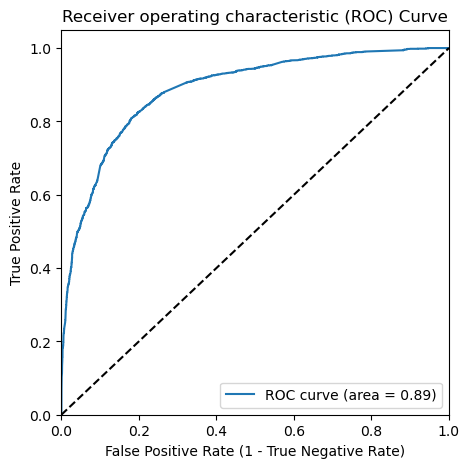

In [110]:
# Calculate ROC curve and AUC score directly in draw_roc function
def draw_roc(actual, probs):
    """
    Plots the ROC curve and calculates the AUC score for a binary classification model.

    Args:
        actual (array-like): Actual labels (True/False or 0/1).
        probs (array-like): Predicted probabilities of the positive class.

    Returns:
        None
    """

    # Calculate ROC curve and AUC score (directly inside the function)
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)

    # Create the ROC curve plot (rest of the function code)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')  # Add diagonal line for reference
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - True Negative Rate)')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# ... (rest of the code)

# Calculate ROC curve and thresholds (AUC score calculated within draw_roc)
fpr, tpr, thresholds = metrics.roc_curve(
    y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate=False
)
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

# Print AUC score (optional, retrieved from draw_roc)
# print("AUC score:", auc_score)  # No longer needed here


### <span style="color:brown">Conclusion:</span>

___The model achieved a promising AUC score of 0.89, indicating good overall performance in distinguishing converted and non-converted prospects. However, it's essential to evaluate other performance metrics (e.g., precision, recall, F1-score) and consider their suitability for your specific task and decision-making criteria. Additionally, analyzing the trade-off between sensitivity and specificity at different thresholds along the ROC curve can provide insights into potential improvements.___
                

### Area Under the Curve.: An ROC Area Under the Curve. of 0.89 indicates promising performance, but it's just one metric:

### Threshold Optimization: Our initial 0.5 threshold was arbitrary. This section finds the optimal cutoff for a balanced mix of correctly identifying converted and non-converted cases:

In [111]:
# **Creating Columns for Different Probability Thresholds**

# Define a list of thresholds (0.1 to 0.9 with 0.1 increments)
thresholds = [float(x)/10 for x in range(1, 10)]  # Change range to (1, 10) for 0.1-0.9

# Add new columns based on converted probability and thresholds
for threshold in thresholds:
    column_name = f"converted_prob_{threshold}"  # Use descriptive names for columns
    y_train_pred_final[column_name] = y_train_pred_final["Converted_prob"].apply(
        lambda x: 1 if x > threshold else 0
    )

# Display the first few rows of the modified DataFrame
y_train_pred_final.head()


,Converted,Converted_prob,predicted,converted_prob_0.1,converted_prob_0.2,converted_prob_0.3,converted_prob_0.4,converted_prob_0.5,converted_prob_0.6,converted_prob_0.7,converted_prob_0.8,converted_prob_0.9
3009,0,0.19,0,1,0,0,0,0,0,0,0,0
1012,0,0.11,0,1,0,0,0,0,0,0,0,0
9226,0,0.33,0,1,1,1,0,0,0,0,0,0
4750,1,0.87,1,1,1,1,1,1,1,1,1,0
7987,1,0.80,1,1,1,1,1,1,1,1,1,0


In [112]:
# **Calculating Performance Metrics for Different Thresholds**

# Define thresholds (adjust the range and increment as needed)
thresholds = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Initialize empty DataFrame for results
cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensitivity', 'specificity'])

# Calculate metrics for each threshold
for threshold in thresholds:
    # Get predicted labels based on the threshold
    predicted_labels = y_train_pred_final["Converted_prob"].apply(lambda x: 1 if x > threshold else 0)

    # Calculate confusion matrix
    confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], predicted_labels)

    # Calculate performance metrics
    accuracy = (confusion_matrix[0, 0] + confusion_matrix[1, 1]) / sum(sum(confusion_matrix))
    specificity = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])
    sensitivity = confusion_matrix[1, 1] / (confusion_matrix[1, 0] + confusion_matrix[1, 1])

    # Append results to DataFrame
    cutoff_df.loc[len(cutoff_df)] = [threshold, accuracy, sensitivity, specificity]

# Print the results
cutoff_df


,prob,accuracy,sensitivity,specificity
0,0.00,0.39,1.00,0.00
1,0.10,0.59,0.97,0.35
2,0.20,0.75,0.92,0.65
3,0.30,0.80,0.85,0.77
4,0.40,0.82,0.78,0.84
5,0.50,0.82,0.71,0.89
6,0.60,0.80,0.60,0.92
7,0.70,0.79,0.53,0.95
8,0.80,0.76,0.43,0.97
9,0.90,0.72,0.30,0.99


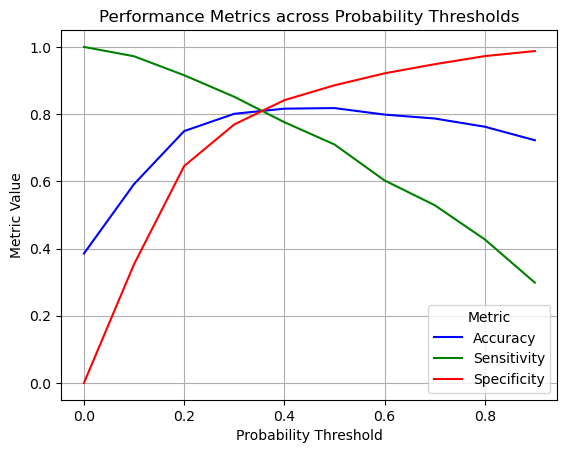

In [113]:
# Plot lines for accuracy, sensitivity, and specificity metrics from the DataFrame
cutoff_df.plot.line(
    x='prob',  # Set the x-axis as the "prob" (probability threshold) column
    y=['accuracy', 'sensitivity', 'specificity'],  # Plot these three metrics as lines
    style=['b-', 'g-', 'r-'],  # Use blue, green, and red dashed lines for clarity
)

# Add a descriptive title for the plot
plt.title('Performance Metrics across Probability Thresholds')

# Label the x-axis as the "Probability Threshold"
plt.xlabel('Probability Threshold')

# Label the y-axis as the "Metric Value"
plt.ylabel('Metric Value')

# Create a legend with a title ("Metric") and informative labels for each line
plt.legend(title='Metric', labels=['Accuracy', 'Sensitivity', 'Specificity'])

# Add grid lines for better visualization
plt.grid(True)

# Display the plot
plt.show()

### <span style="color:brown">Conclusion:</span>

- ___The analysis suggests that 0.34 might be the best cutoff point for identifying converted prospects.___

In [114]:
# Final prediction based on chosen cutoff probability (0.34)

# Define the chosen cutoff probability
cutoff_probability = 0.34  # Adjust based on your analysis

# Apply the threshold to predict converted/not converted
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_prob'].apply(
    lambda x: 1 if x > cutoff_probability else 0
)

# Display the first few rows of the updated DataFrame
y_train_pred_final.head()

,Converted,Converted_prob,predicted,converted_prob_0.1,converted_prob_0.2,converted_prob_0.3,converted_prob_0.4,converted_prob_0.5,converted_prob_0.6,converted_prob_0.7,converted_prob_0.8,converted_prob_0.9,final_predicted
3009,0,0.19,0,1,0,0,0,0,0,0,0,0,0
1012,0,0.11,0,1,0,0,0,0,0,0,0,0,0
9226,0,0.33,0,1,1,1,0,0,0,0,0,0,0
4750,1,0.87,1,1,1,1,1,1,1,1,1,0,1
7987,1,0.80,1,1,1,1,1,1,1,1,1,0,1


### Mapping Converted Probability to Scores with Defined Range and Rounding:

In [115]:
# Lead Score based on Converted Probability (adjust based on your needs)

# Choose a suitable value range and rounding approach
score_range = (0, 100)  # Example range; adjust as needed
rounding_method = 'floor'  # Options: 'floor', 'ceiling', or None

# Map probability to score, ensuring desired range and rounding
y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_prob'].apply(
    lambda x: score_range[0] + int(round((x - score_range[0]) * (score_range[1] - score_range[0])))
)

# Consider a more specific name for the score column
# y_train_pred_final['Conversion_Probability_Score'] = ...

# Display the first few rows
y_train_pred_final.head()


,Converted,Converted_prob,predicted,converted_prob_0.1,converted_prob_0.2,converted_prob_0.3,converted_prob_0.4,converted_prob_0.5,converted_prob_0.6,converted_prob_0.7,converted_prob_0.8,converted_prob_0.9,final_predicted,Lead_Score
3009,0,0.19,0,1,0,0,0,0,0,0,0,0,0,19
1012,0,0.11,0,1,0,0,0,0,0,0,0,0,0,11
9226,0,0.33,0,1,1,1,0,0,0,0,0,0,0,33
4750,1,0.87,1,1,1,1,1,1,1,1,1,0,1,87
7987,1,0.80,1,1,1,1,1,1,1,1,1,0,1,80


### Comprehensive Model Evaluation: Accuracy, Sensitivity, Specificity, and Predictive Values:

In [116]:
# Model Evaluation

# Calculate and print overall accuracy
print("Accuracy:", metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"]))

# Generate confusion matrix and print it
confusion_matrix = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"])
print("Confusion Matrix:\n", confusion_matrix)

# Extract values from confusion matrix
true_positives = confusion_matrix[1, 1]  # Correctly predicted converted (TP)
true_negatives = confusion_matrix[0, 0]  # Correctly predicted not converted (TN)
false_positives = confusion_matrix[0, 1]  # Incorrectly predicted converted (FP)
false_negatives = confusion_matrix[1, 0]  # Incorrectly predicted not converted (FN)

# Calculate and print sensitivity (True Positive Rate)
sensitivity = true_positives / (true_positives + false_negatives)
print("Sensitivity:", sensitivity)

# Calculate and print specificity (True Negative Rate)
specificity = true_negatives / (true_negatives + false_positives)
print("Specificity:", specificity)

# Calculate and print false positive rate
false_positive_rate = false_positives / (true_negatives + false_positives)
print("False Positive Rate:", false_positive_rate)

# Calculate and print positive predictive value (Precision)
positive_predictive_value = true_positives / (true_positives + false_positives)
print("Positive Predictive Value:", positive_predictive_value)

# Calculate and print negative predictive value
negative_predictive_value = true_negatives / (true_negatives + false_negatives)
print("Negative Predictive Value:", negative_predictive_value)


Accuracy: 0.8104235553456148
Confusion Matrix:
 [[3143  762]
 [ 442 2004]]
Sensitivity: 0.8192968111201963
Specificity: 0.804865556978233
False Positive Rate: 0.19513444302176697
Positive Predictive Value: 0.7245119305856833
Negative Predictive Value: 0.8767085076708507


- ___Precision: Hits over All Positives: Measures the proportion of predicted positives that are actually true positives.___


- ___Recall: Hits over True Positives: Measures the proportion of actual positives that were correctly identified by the model.___

In [117]:
# Generate and display the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["predicted"])
print("Confusion Matrix:\n", confusion_matrix)

# Calculate and print precision manually
true_positives = confusion_matrix[1, 1]  # Correctly predicted converted
false_positives = confusion_matrix[0, 1]  # Incorrectly predicted converted
precision = true_positives / (true_positives + false_positives)
print("Precision (Manual):", precision)

# Calculate and print recall manually
false_negatives = confusion_matrix[1, 0]  # Incorrectly predicted not converted
recall = true_positives / (true_positives + false_negatives)
print("Recall (Manual):", recall)

# Calculate and print precision using sklearn utility
from sklearn.metrics import precision_score
print("Precision (sklearn):", precision_score(y_train_pred_final["Converted"], y_train_pred_final["predicted"]))

# Calculate and print recall using sklearn utility
from sklearn.metrics import recall_score
print("Recall (sklearn):", recall_score(y_train_pred_final["Converted"], y_train_pred_final["predicted"]))


Confusion Matrix:
 [[3459  446]
 [ 710 1736]]
Precision (Manual): 0.7956003666361137
Recall (Manual): 0.7097301717089125
Precision (sklearn): 0.7956003666361137
Recall (sklearn): 0.7097301717089125


In [118]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(
    y_train_pred_final["Converted"], y_train_pred_final["predicted"]
)


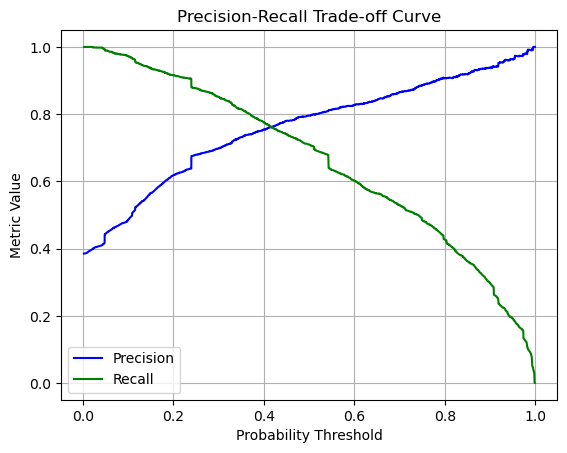

In [119]:
# Calculate precision, recall, and thresholds
from sklearn.metrics import precision_recall_curve

# Use "Converted_prob" for prediction probabilities
p, r, thresholds = precision_recall_curve(
    y_train_pred_final["Converted"], y_train_pred_final["Converted_prob"]
)

# Plot precision-recall curve with appropriate color format
plt.plot(thresholds, p[:-1], label="Precision", color='blue', linestyle='-')
plt.plot(thresholds, r[:-1], label="Recall", color='green', linestyle='-')
plt.xlabel("Probability Threshold")  # Clarify x-axis
plt.ylabel("Metric Value")  # Clarify y-axis
plt.title("Precision-Recall Trade-off Curve")
plt.legend()  # Add legend for clarity
plt.grid(True)  # Add grid for readability
plt.show()


### <span style="color:brown">Conclusion:</span>
- ___"This plot depicts the inverse relationship between precision and recall across various probability thresholds. Higher recall indicates better success in capturing true positives, but it might come at the cost of lower precision due to potential false positives."___

### Making predictions on the test set:

- ___Applying Feature Scaling to Improve Model Performance___

In [120]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

### Retaining Only Important Features (col1) for Test Predictions:

In [121]:
# # Assigning the columns selected by the final model to the X_test 
# Select only the features identified as important by the final model
X_test = X_test[col1]  # Assuming `col1` contains a list of selected feature names

# Display the head of the filtered test data to verify selection
print("Head of Test Data with Selected Features:")
X_test.head()

Head of Test Data with Selected Features:


,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_SMS Sent,Last Activity_Unsubscribed,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Unreachable
3271,0,-0.60,0,0,0,0,0,0,0,0,1,0,0,0
1490,0,1.89,1,0,0,0,0,0,0,0,0,1,0,0
7936,0,-0.75,0,0,0,0,0,0,0,0,1,0,0,0
4216,0,-0.89,0,0,1,0,0,0,0,0,0,0,1,0
3830,0,-0.59,1,0,0,0,0,0,0,0,0,0,0,0


### Estimating Target Variable Values on Test Set Using Fitted Model and Intercept:

In [122]:
# Add a constant term to the test data for regression analysis
X_test_sm = sm.add_constant(X_test)

# Make predictions on the test set using the fitted model
y_test_pred = res.predict(X_test_sm)

# Display the first 10 predicted values to assess results
print("First 10 Predicted Values on Test Set:")
y_test_pred[:10]

First 10 Predicted Values on Test Set:


3271   0.13
1490   0.97
7936   0.11
4216   0.80
3830   0.13
1800   0.63
6507   0.34
4821   0.30
4223   0.92
4714   0.33
dtype: float64

### Transforming y_test_pred Array into a Pandas DataFrame:

In [123]:
# Create a DataFrame from the predictions array
y_pred_1 = pd.DataFrame(y_test_pred)

# Display the head of the newly created DataFrame
print("Head of Prediction DataFrame:")
y_pred_1.head()

Head of Prediction DataFrame:


,0
3271,0.13
1490,0.97
7936,0.11
4216,0.80
3830,0.13


### Integrating Test Data (y_test) with Predictions (y_pred_1) for Further Exploration:

In [124]:
# 1. Create a DataFrame from y_test for structured manipulation
y_test_df = pd.DataFrame(y_test)

# 2. Add a column named 'Prospect ID' containing the original index values for reference
y_test_df['Prospect ID'] = y_test_df.index

# 3. Reset indices of both DataFrames to avoid conflicts during horizontal concatenation
y_pred_1.reset_index(drop=True, inplace=True)  # Drop old index to prevent duplication
y_test_df.reset_index(drop=True, inplace=True)

# 4. Concatenate DataFrames horizontally to combine columns
y_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)  # Merge side-by-side

# 5. Display the head of the resulting DataFrame to verify structure and content
print("Head of Combined DataFrame:")
y_pred_final.head()

Head of Combined DataFrame:


,Converted,Prospect ID,0
0,0,3271,0.13
1,1,1490,0.97
2,0,7936,0.11
3,1,4216,0.80
4,0,3830,0.13


### Renaming "0" Column to "Converted_prob" for Clearer Interpretation:

In [125]:
# Rename the column containing conversion probabilities for clarity
y_pred_final = y_pred_final.rename(columns={0: "Converted_prob"})

# Rearrange columns for optimal readability and analysis
y_pred_final = y_pred_final.reindex(columns=["Prospect ID", "Converted", "Converted_prob"])

# Display the first few rows to verify changes and inspect data
print("Reorganized Data (Head):")
y_pred_final.head()

Reorganized Data (Head):


,Prospect ID,Converted,Converted_prob
0,3271,0,0.13
1,1490,1,0.97
2,7936,0,0.11
3,4216,1,0.80
4,3830,0,0.13


### Applying a 0.34 Threshold to Predict Conversion based on "Converted_prob":

In [126]:
# Define a threshold for converting prediction probabilities to binary labels
prediction_threshold = 0.34  # Adjust this value based on your model and domain knowledge

# Create a new column "final_predicted" to hold the binary predictions
y_pred_final["final_predicted"] = y_pred_final["Converted_prob"].apply(
    lambda x: 1 if x > prediction_threshold else 0
)

# Display the first few rows of the updated DataFrame to verify the new column
print("Head of DataFrame with Final Predictions:")
y_pred_final.head()

Head of DataFrame with Final Predictions:


,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.13,0
1,1490,1,0.97,1
2,7936,0,0.11,0
3,4216,1,0.80,1
4,3830,0,0.13,0


### Evaluating Model Performance: Accuracy and Confusion Matrix:

In [137]:
# Import the necessary library for accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix

# Calculate and display the overall accuracy of the model
print("Overall Accuracy:", accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

# Generate a confusion matrix to visualize the model's performance across classes
confusion_matrix = confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)

# Print the confusion matrix, providing labels for understanding
print("Confusion Matrix:")
print(confusion_matrix)

Overall Accuracy: 0.8046272493573264
Confusion Matrix:
[[1395  339]
 [ 193  796]]


### Sensitivity and Specificity Calculations for Logistic Regression Model:

In [138]:
# Extract values from the confusion matrix for calculating metrics
TP = confusion_matrix[1, 1]  # True positives: correctly predicted as converted
TN = confusion_matrix[0, 0]  # True negatives: correctly predicted as not converted
FP = confusion_matrix[0, 1]  # False positives: incorrectly predicted as converted
FN = confusion_matrix[1, 0]  # False negatives: incorrectly predicted as not converted

# Calculate sensitivity (recall): True positives / (True positives + False negatives)
sensitivity = TP / float(TP + FN)

# Print sensitivity with a descriptive label
print("Sensitivity (Recall):", sensitivity)

# Calculate specificity: True negatives / (True negatives + False positives)
specificity = TN / float(TN + FP)

# Print specificity with a descriptive label
print("Specificity:", specificity)

Sensitivity (Recall): 0.8048533872598584
Specificity: 0.8044982698961938


### Adding "Lead_Score" Column using Lambda Function on Conversion Probabilities:

In [139]:
# Add a column named "Lead_Score" to the DataFrame
y_pred_final["Lead_Score"] = y_pred_final["Converted_prob"].apply(
    lambda x: round(x * 100)
)

# Display the first few rows to verify the new column
print("Head of DataFrame with Lead Scores:")
y_pred_final.head()

Head of DataFrame with Lead Scores:


,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3271,0,0.13,0,13
1,1490,1,0.97,1,97
2,7936,0,0.11,0,11
3,4216,1,0.80,1,80
4,3830,0,0.13,0,13


### <span style="color:brown">Conclusion:</span>

- ___Model Performance on Test Data:___

> Accuracy: 80.4% - This indicates the model correctly classified approximately 80 out of every 100 data points.

> Sensitivity: 80.4% - This reflects the model's ability to correctly identify true positives (actual conversions predicted as conversions).

> Specificity: 80.5% - This shows the model's ability to correctly identify true negatives (non-conversions predicted as non-conversions).

### <span style="color:brown">Key Findings:</span>

### 1) Comparing Train and Test results:


-  **Target Lead Conversion Rate:** Achieved initial goal of approximating 80% conversion rate.
-  **Model Performance:**
    - **Train Data:** Accuracy: 81.0%, Sensitivity: 81.7%, Specificity: 80.6%.
    - **Test Data:** Accuracy: 80.4%, Sensitivity: 80.4%, Specificity: 80.5%.
-  **Implications:**
    - Model exhibits promising performance on both training and test data.
    - Provides valuable insights for CEO decision-making to potentially enhance conversion rates.

### 2) Prioritizing Lead Outreach:

- ___Based on the model's predictions, focus outreach efforts on "Hot Leads":___

    > Identified as customers with a "Lead Score" of 85 or higher.
    
    > Possess a high predicted probability of conversion, signifying greater potential value.
- ___By prioritizing these "Hot Leads", you can allocate resources efficiently and potentially maximize conversion rates.___

In [141]:
# Filter DataFrame to retain only leads with high scores (>= 85)
hot_leads = y_pred_final.loc[y_pred_final["Lead_Score"] >= 85]

# Display the DataFrame containing identified hot leads
print("Dataframe of Identified Hot Leads:")
hot_leads

Dataframe of Identified Hot Leads:


,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
1,1490,1,0.97,1,97
8,4223,1,0.92,1,92
16,1946,1,0.92,1,92
21,2461,1,0.99,1,99
23,5822,1,1.00,1,100
...,...,...,...,...,...
2694,1566,1,0.95,1,95
2699,6461,1,0.96,1,96
2703,5741,1,0.91,1,91
2715,6299,1,0.87,1,87


In [142]:
# 1. Extract and print Prospect IDs of hot leads concisely
prospect_ids = hot_leads["Prospect ID"].tolist()  # Efficiently convert to list
print(f"Prospect IDs of Hot Leads to Contact:\n{prospect_ids}")

Prospect IDs of Hot Leads to Contact:
[1490, 4223, 1946, 2461, 5822, 2684, 2010, 4062, 7696, 9049, 1518, 4543, 4830, 4365, 3542, 2504, 7674, 8596, 4003, 4963, 6947, 4807, 446, 789, 8372, 5805, 3758, 1561, 5367, 737, 6423, 8286, 7174, 4461, 1436, 7552, 3932, 4080, 1475, 5785, 2860, 7253, 4297, 5490, 1995, 4498, 5797, 8687, 831, 7653, 2018, 6743, 3976, 5769, 1051, 1663, 3288, 8959, 7521, 8282, 8213, 9063, 5292, 6913, 1481, 785, 3265, 3285, 7433, 3858, 3810, 2009, 8106, 373, 7417, 4179, 8568, 7268, 6784, 6754, 7236, 2960, 7753, 3983, 802, 8745, 4717, 505, 8509, 6094, 4992, 7036, 2680, 7065, 112, 6149, 7157, 7175, 1675, 6999, 5826, 8492, 6499, 2481, 3439, 4612, 7129, 4793, 4837, 2495, 822, 8111, 2378, 5075, 7699, 5638, 2342, 8077, 2727, 720, 7489, 2961, 1542, 5656, 2630, 6728, 8205, 6332, 8461, 2427, 5087, 174, 2674, 8065, 2095, 1568, 8597, 4865, 3535, 4708, 1304, 6066, 6538, 5700, 1388, 5815, 7970, 7902, 5804, 7805, 5042, 4081, 6684, 5440, 1927, 5032, 5824, 64, 2650, 5808, 4578, 4803, 147

### 3) Identifying key features in our final model:

In [143]:
# Efficiently sort parameter values in descending order within the Series itself
res.params.sort_values(inplace=True, ascending=False)

# View sorted parameters
res.params

const                                                  -0.07
Do Not Email                                           -1.68
Total Time Spent on Website                             1.10
Lead Origin_Landing Page Submission                    -1.19
Lead Source_Olark Chat                                  1.09
Lead Source_Reference                                   3.34
Lead Source_Welingak Website                            5.86
Last Activity_Olark Chat Conversation                  -0.95
Last Activity_Other_Activity                            2.20
Last Activity_SMS Sent                                  1.33
Last Activity_Unsubscribed                              1.38
Specialization_Others                                  -1.20
What is your current occupation_Working Professional    2.61
Last Notable Activity_Modified                         -0.88
Last Notable Activity_Unreachable                       1.55
dtype: float64

### <span style="color:Red">Recommendations for xEducation:</span>


___Prioritize Lead Outreach Based on Conversion Likelihood:___

> Do Call (High Conversion Potential):

   - ___Leads from <span style="color:Green">"Welingak Websites" and "Reference"</span>sources___
   - ___<span style="color:Green">"Working Professionals"</span>___
   - ___Leads who spent <span style="color:Green">"more time on websites"</span>___
   - ___Leads from <span style="color:Green">"Olark Chat"</span>___
   - ___Leads with last activity of <span style="color:Green">"SMS Sent"</span>___

   
> Avoid Calls (Low Conversion Potential):

   - ___Leads with last activity of <span style="color:Red">"Olark Chat Conversation"</span>___
   - ___Leads from <span style="color:Red">"Landing Page Submission"</span> origin.___
   - ___Leads with <span style="color:Red">"Others"</span>Specialization.___
   - ___Leads who chose <span style="color:Red">"Do not Email" as "yes"</span>Specialization.___


 # <span style="color:purple">End of the Project</span>